# Experiments

## Raw Text (With Header and Interviewer)

In [ ]:
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
                labels.append(label)
    return texts, labels

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-P

In [ ]:
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

test_dir = "test_dir"

x_test = load_texts_from_directory(test_dir)
print(x_test)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

["@UTF8\n@PID:\t11312/t-00002388-1\n@Begin\n@Languages:\teng\n@Participants:\tPAR Participant, INV Investigator\n@ID:\teng|Pitt|PAR|63;|female|_X_||Participant|_Y_||\n@ID:\teng|Pitt|INV|||||Investigator|||\n@Media:\tS160, audio\n*PAR:\t&uh this boy is about to fall off o(f) the stool . \x150_3957\x15\n%mor:\tdet:dem|this n|boy cop|be&3S adv|about inf|to v|fall adv|off\n\tprep|of det:art|the n|stool .\n%gra:\t1|2|DET 2|3|SUBJ 3|0|ROOT 4|6|JCT 5|6|INF 6|3|CPRED 7|6|JCT 8|6|JCT\n\t9|10|DET 10|8|POBJ 11|3|PUNCT\n*PAR:\tthe mother is &uh washing dishes and the water's spilling over on\n\tthe &uh (.) kitchen floor . \x153957_12857\x15\n%mor:\tdet:art|the n|mother aux|be&3S part|wash-PRESP n|dish-PL coord|and\n\tdet:art|the n|water~aux|be&3S part|spill-PRESP adv|over prep|on\n\tdet:art|the n|kitchen n|floor .\n%gra:\t1|2|DET 2|4|SUBJ 3|4|AUX 4|0|ROOT 5|4|OBJ 6|10|LINK 7|8|DET 8|10|SUBJ\n\t9|10|AUX 10|4|CJCT 11|10|JCT 12|10|JCT 13|15|DET 14|15|MOD 15|12|POBJ\n\t16|4|PUNCT\n*PAR:\tthe wind is b

In [ ]:
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7708333333333334


    k  Test Set Accuracy
0   1           0.687500
1   3           0.750000
2   5           0.791667
3   7           0.770833
4   9           0.770833
5  11           0.770833
6  13           0.770833
7  15           0.770833
8  17           0.750000
9  19           0.687500
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


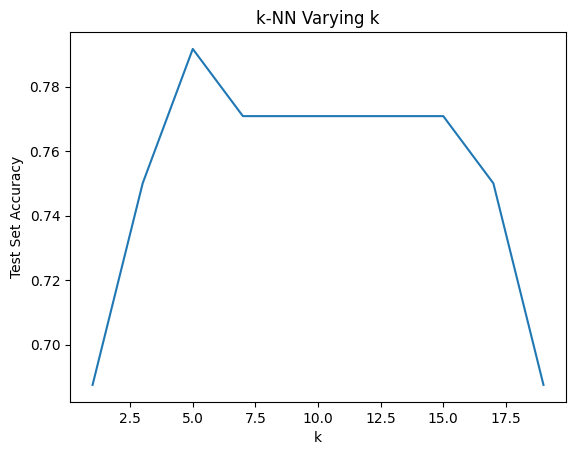

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

## Text (With Header and No Interviewer)

In [ ]:
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
                labels.append(label)
    return texts, labels

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|J

In [ ]:
import os
import chardet
import re

def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

test_dir = "test_dir"

x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
print(x_test)

["@UTF8\n@PID:\t11312/t-00002388-1\n@Begin\n@Languages:\teng\n@Participants:\tPAR Participant, INV Investigator\n@ID:\teng|Pitt|PAR|63;|female|_X_||Participant|_Y_||\n@ID:\teng|Pitt|INV|||||Investigator|||\n@Media:\tS160, audio\n*PAR:\t&uh this boy is about to fall off o(f) the stool . \x150_3957\x15\n%mor:\tdet:dem|this n|boy cop|be&3S adv|about inf|to v|fall adv|off\n\tprep|of det:art|the n|stool .\n%gra:\t1|2|DET 2|3|SUBJ 3|0|ROOT 4|6|JCT 5|6|INF 6|3|CPRED 7|6|JCT 8|6|JCT\n\t9|10|DET 10|8|POBJ 11|3|PUNCT\n*PAR:\tthe mother is &uh washing dishes and the water's spilling over on\n\tthe &uh (.) kitchen floor . \x153957_12857\x15\n%mor:\tdet:art|the n|mother aux|be&3S part|wash-PRESP n|dish-PL coord|and\n\tdet:art|the n|water~aux|be&3S part|spill-PRESP adv|over prep|on\n\tdet:art|the n|kitchen n|floor .\n%gra:\t1|2|DET 2|4|SUBJ 3|4|AUX 4|0|ROOT 5|4|OBJ 6|10|LINK 7|8|DET 8|10|SUBJ\n\t9|10|AUX 10|4|CJCT 11|10|JCT 12|10|JCT 13|15|DET 14|15|MOD 15|12|POBJ\n\t16|4|PUNCT\n*PAR:\tthe wind is b

In [ ]:
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.75


    k  Test Set Accuracy
0   1           0.625000
1   3           0.750000
2   5           0.791667
3   7           0.750000
4   9           0.729167
5  11           0.750000
6  13           0.750000
7  15           0.770833
8  17           0.708333
9  19           0.770833
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


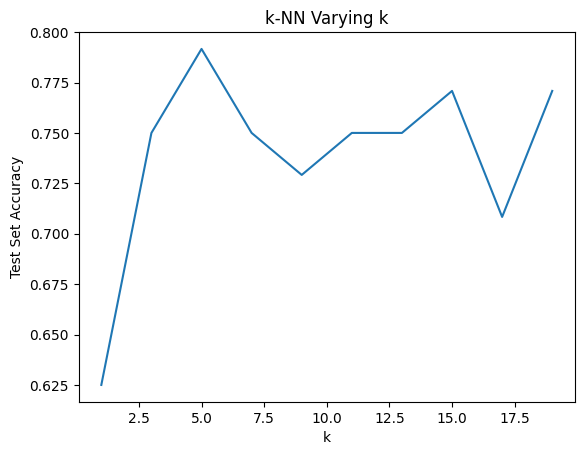

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

## Text (No Header With Interviewer)

In [ ]:
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                
                lines = text.split('\n')
                text = '\n'.join(lines[8:])
                
                texts.append(text)
                labels.append(label)
    return texts, labels

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD

In [ ]:
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

test_dir = "test_dir"

x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [ ]:
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7291666666666666


    k  Test Set Accuracy
0   1           0.708333
1   3           0.687500
2   5           0.687500
3   7           0.729167
4   9           0.708333
5  11           0.708333
6  13           0.687500
7  15           0.666667
8  17           0.687500
9  19           0.666667
Best k value: 7
Accuracy on test set with best k: 0.7291666666666666


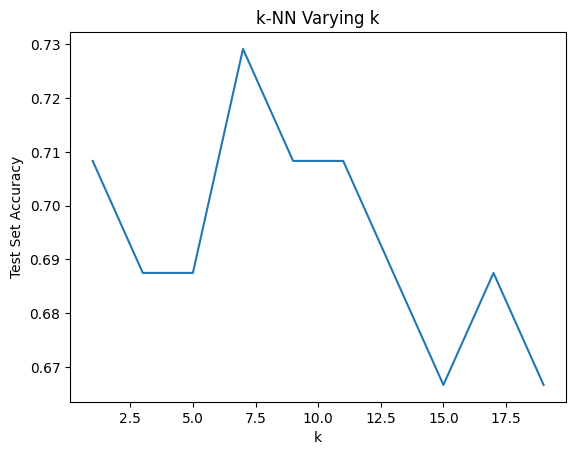

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

## Text (No Header and No Interviewer)

In [ ]:
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                lines = text.split('\n')
                text = '\n'.join(lines[8:])

                texts.append(text)
                labels.append(label)
    return texts, labels

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD
	16|3|PUNCT
*PAR:	an(d) &uh the window's open . 13310_20608
%mor:	coord|and det:art|the adj|window&dn-POSS adj|open .
%gra:	1

In [ ]:
import os
import chardet
import re

def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

test_dir = "test_dir"

x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [ ]:
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7083333333333334


    k  Test Set Accuracy
0   1           0.708333
1   3           0.708333
2   5           0.687500
3   7           0.708333
4   9           0.750000
5  11           0.708333
6  13           0.666667
7  15           0.687500
8  17           0.666667
9  19           0.687500
Best k value: 9
Accuracy on test set with best k: 0.75


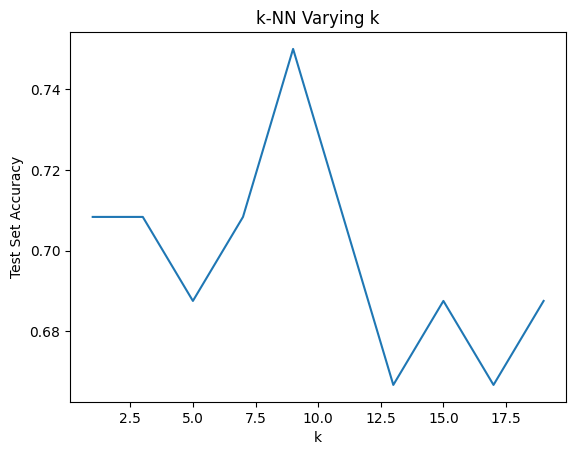

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

## Clean Text (Patient Text Strings Only)

### Concatenated

In [ ]:
import os
import chardet
import re

def load_texts_from_directory(directory, label=None):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                if label is not None:
                    labels.append(label)
    return texts, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

print(x_train[0])
print(x_test[0])

well there's a mother standing there &uh &uh washing the dishes 	an(d) the sink is overspilling [: overflowing] [* s:r] .  an(d) &uh the window's open .  and outside the window there's a <walk with a> [//] &c curved walk 	with a garden .  and you can see another &uh &uh building there .  looks like a garage or something with curtains and the grass in the 	garden .  and there are dishes [//] &uh &uh two cups and a saucer on the sink 	.  and &uh she's getting her feet wet from the overflow of the water 	from the sink .  she seems to be oblivious to the fact that the &s sink is 	overflowing .  she's also oblivious to the fact that her kids are stealin(g) 	cookies out o(f) the cookie jar .  and the kid on the stool is gonna fall off the stool .  he's standing up there in the cupboard takin(g) cookies out o(f) 	the jar, handin(g) them to his [//] &uh a girl about the same age . 	 the kids are somewhere around seven or eight years old or nine .  an(d) the mother is gonna get shocked <when th

    k  Cross-Validation Accuracy
0   1                   0.777778
1   3                   0.787037
2   5                   0.805556
3   7                   0.787037
4   9                   0.768519
5  11                   0.722222
6  13                   0.712963
7  15                   0.694444
8  17                   0.712963
9  19                   0.675926
Best k value: 5


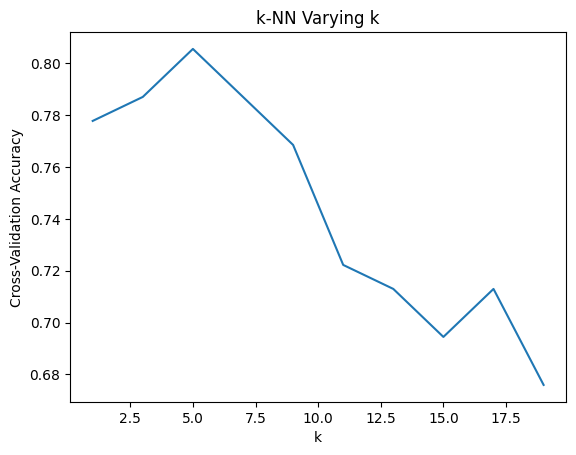

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

k_values = list(range(1, 20, 2))

cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)
    cv_accuracies.append(cv_scores.mean())

results_df = pd.DataFrame({
    'k': k_values,
    'Cross-Validation Accuracy': cv_accuracies
})

print(results_df)

best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

plt.plot(k_values, cv_accuracies)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Varying k')
plt.show()

In [ ]:
import gzip
from sklearn.ensemble import RandomForestClassifier

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(train_ncd, y_train)

accuracy = rf_clf.score(test_ncd, y_test)
print("Accuracy on test set with Random Forest:", accuracy)

Accuracy on test set with Random Forest: 0.7916666666666666


In [ ]:
import gzip
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def compress_seq(sequencia):
    s = bytes(sequencia, encoding='utf-8')
    t = gzip.compress(s)
    return list(t)

def pad_sequences(sequences, max_len, pad_value=-1):
    return [np.pad(seq, (0, max_len - len(seq)), 'constant', constant_values=pad_value) for seq in sequences]

train_compressed = [compress_seq(seq) for seq in x_train]

test_compressed = [compress_seq(seq) for seq in x_test]

max_len = max(max(len(seq) for seq in train_compressed), max(len(seq) for seq in test_compressed))

train_padded = pad_sequences(train_compressed, max_len)

test_padded = pad_sequences(test_compressed, max_len)

X_train_padded = np.array(train_padded)
X_test_padded = np.array(test_padded)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train_padded, y_train)

y_pred = rf_clf.predict(X_test_padded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set with Random Forest:", accuracy)

Accuracy on test set with Random Forest: 0.5625


Feature ranking:
1. Feature 37 (0.0539)
2. Feature 18 (0.0452)
3. Feature 19 (0.0362)
4. Feature 32 (0.0342)
5. Feature 42 (0.0324)
6. Feature 17 (0.0320)
7. Feature 30 (0.0276)
8. Feature 77 (0.0250)
9. Feature 33 (0.0241)
10. Feature 4 (0.0231)
11. Feature 89 (0.0211)
12. Feature 64 (0.0205)
13. Feature 73 (0.0180)
14. Feature 2 (0.0176)
15. Feature 39 (0.0175)
16. Feature 1 (0.0175)
17. Feature 29 (0.0161)
18. Feature 53 (0.0150)
19. Feature 13 (0.0144)
20. Feature 46 (0.0139)
21. Feature 3 (0.0138)
22. Feature 22 (0.0134)
23. Feature 36 (0.0128)
24. Feature 76 (0.0120)
25. Feature 21 (0.0113)
26. Feature 92 (0.0104)
27. Feature 35 (0.0103)
28. Feature 10 (0.0099)
29. Feature 88 (0.0089)
30. Feature 24 (0.0089)
31. Feature 27 (0.0088)
32. Feature 95 (0.0087)
33. Feature 44 (0.0087)
34. Feature 107 (0.0087)
35. Feature 0 (0.0086)
36. Feature 5 (0.0085)
37. Feature 97 (0.0085)
38. Feature 11 (0.0082)
39. Feature 9 (0.0082)
40. Feature 38 (0.0080)
41. Feature 43 (0.0080)
42. Feature 40

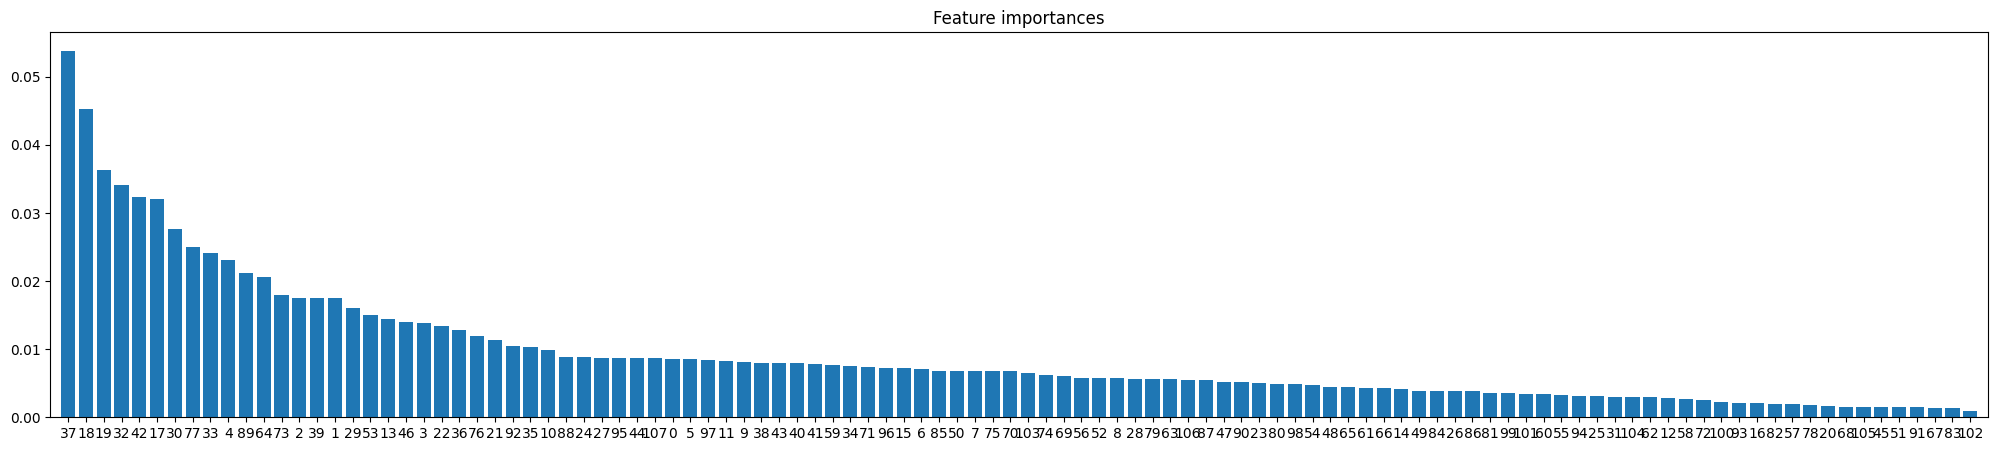

In [ ]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(importances)):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]:.4f})")

plt.figure(figsize=(25, 5))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlim([-1, len(importances)])
plt.show()

In [ ]:
import gzip
import numpy as np
from sktime.classification.deep_learning import CNNClassifier

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

cnn_clf = CNNClassifier(n_epochs=100, batch_size=12)

cnn_clf.fit(train_ncd, y_train)

accuracy = cnn_clf.score(test_ncd, y_test)
print("Accuracy on test set with CNNClassifier:", accuracy)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


4/4 [==============================] - 0s 4ms/step
Accuracy on test set with CNNClassifier: 0.8125


In [25]:
import gzip
import numpy as np
from sktime.classification.deep_learning import CNNClassifier

def compress_seq(sequencia):
    s = bytes(sequencia, encoding='utf-8')
    t = gzip.compress(s)
    return list(t)

x_train_compressed = [compress_seq(seq) for seq in x_train]
x_test_compressed = [compress_seq(seq) for seq in x_test]

max_len = max(max(len(seq) for seq in x_train_compressed),
              max(len(seq) for seq in x_test_compressed))

x_train_padded = [np.pad(seq, (0, max_len - len(seq)), 'constant', constant_values=-1) for seq in x_train_compressed]
x_test_padded = [np.pad(seq, (0, max_len - len(seq)), 'constant', constant_values=-1) for seq in x_test_compressed]

x_train_padded = np.array(x_train_padded)
x_test_padded = np.array(x_test_padded)

y_train = np.array(y_train)
y_test = np.array(y_test)

cnn_clf = CNNClassifier(n_epochs=100, batch_size=12)
cnn_clf.fit(x_train_padded, y_train)

accuracy = cnn_clf.score(x_test_padded, y_test)
print("Accuracy on test set with CNNClassifier:", accuracy)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


4/4 [==============================] - 0s 4ms/step
Accuracy on test set with CNNClassifier: 0.5


In [ ]:
import gzip
import numpy as np
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

def transform_for_rocket(ncd_matrix):
    n_instances = ncd_matrix.shape[0]
    n_timepoints = ncd_matrix.shape[1]
    rocket_data = np.empty((n_instances, 1, n_timepoints))
    for i in range(n_instances):
        rocket_data[i, 0, :] = ncd_matrix[i]
    return rocket_data

train_rocket_data = transform_for_rocket(train_ncd)
test_rocket_data = transform_for_rocket(test_ncd)

rocket = Rocket()
rocket.fit(train_rocket_data)
train_features = rocket.transform(train_rocket_data)
test_features = rocket.transform(test_rocket_data)

classifier = RidgeClassifierCV()

classifier.fit(train_features, y_train)

accuracy = classifier.score(test_features, y_test)
print("Accuracy on test set with Rocket and RidgeClassifierCV:", accuracy)

Accuracy on test set with Rocket and RidgeClassifierCV: 0.7916666666666666


In [ ]:
import gzip
import numpy as np
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV

def compress_seq(sequencia):
    s = bytes(sequencia, encoding='utf-8')
    t = gzip.compress(s)
    return list(t)

x_train_compressed = [compress_seq(seq) for seq in x_train]
x_test_compressed = [compress_seq(seq) for seq in x_test]

max_len = max(max(len(seq) for seq in x_train_compressed), max(len(seq) for seq in x_test_compressed))

x_train_padded = [np.pad(seq, (0, max_len - len(seq)), 'constant', constant_values=-1) for seq in x_train_compressed]
x_test_padded = [np.pad(seq, (0, max_len - len(seq)), 'constant', constant_values=-1) for seq in x_test_compressed]

x_train_padded = np.array(x_train_padded)
x_test_padded = np.array(x_test_padded)

def transform_for_rocket(padded_data):
    n_instances = padded_data.shape[0]
    n_timepoints = padded_data.shape[1]
    rocket_data = np.empty((n_instances, 1, n_timepoints))
    for i in range(n_instances):
        rocket_data[i, 0, :] = padded_data[i]
    return rocket_data

train_rocket_data = transform_for_rocket(x_train_padded)
test_rocket_data = transform_for_rocket(x_test_padded)

rocket = Rocket()
rocket.fit(train_rocket_data)
train_features = rocket.transform(train_rocket_data)
test_features = rocket.transform(test_rocket_data)

classifier = RidgeClassifierCV()

classifier.fit(train_features, y_train)

accuracy = classifier.score(test_features, y_test)
print("Accuracy on test set with Rocket and RidgeClassifierCV:", accuracy)

Accuracy on test set with Rocket and RidgeClassifierCV: 0.625


### Matrices

    k  Test Set Accuracy
0   1           0.458333
1   3           0.416667
2   5           0.500000
3   7           0.541667
4   9           0.479167
5  11           0.416667
6  13           0.479167
7  15           0.333333
8  17           0.479167
9  19           0.458333
Best k value: 7
Accuracy on test set with best k: 0.5416666666666666


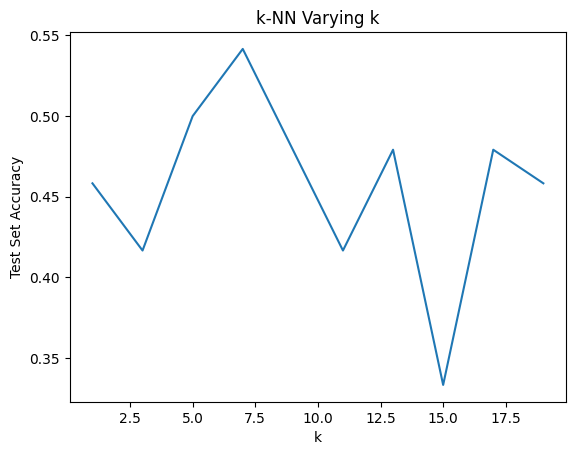

In [ ]:
import os
import pandas as pd
import numpy as np
import gzip
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def load_matrices_from_directory(directory, label=None):
    matrices = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            matrix = pd.read_csv(file_path).values
            matrices.append(matrix)
            if label is not None:
                labels.append(label)
    return matrices, labels

def ncd(matrix1, matrix2):
    matrix1_bytes = matrix1.tobytes()
    matrix2_bytes = matrix2.tobytes()
    x_compressed = len(gzip.compress(matrix1_bytes))
    x2_compressed = len(gzip.compress(matrix2_bytes))
    xx2 = len(gzip.compress(matrix1_bytes + matrix2_bytes))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, y_neg = load_matrices_from_directory(negative_dir, 0)

x_pos, y_pos = load_matrices_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, _ = load_matrices_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### Not concatenated

In [ ]:
import os
import chardet
import re
import numpy as np

def load_texts_from_directory(directory, label=None):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_texts = extract_par_texts(text)
                texts.extend(par_texts)
                if label is not None:
                    labels.extend([label] * len(par_texts))
    return texts, labels

def extract_par_texts(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    par_texts = []
    for line in par_lines:
        line = line.replace('\n', ' ')
        cleaned_line = re.sub(r'\\d+_\d+\', '', line)
        par_texts.append(cleaned_line.strip())
    return par_texts

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

y_test_manual = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

x_test = []
y_test = []
label_index = 0

for filename in os.listdir(test_dir):
    if filename.endswith(".cha"):
        file_path = os.path.join(test_dir, filename)
        with open(file_path, 'rb') as file:
            raw_data = file.read()
            result = chardet.detect(raw_data)
            text = raw_data.decode(result['encoding'])
            par_texts = extract_par_texts(text)
            x_test.extend(par_texts)
            if label_index < len(y_test_manual):
                y_test.extend([y_test_manual[label_index]] * len(par_texts))
                label_index += 1

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(1492,)
(1492,)
(590,)
(590,)


    k  Test Set Accuracy
0   1           0.567797
1   3           0.572881
2   5           0.596610
3   7           0.637288
4   9           0.632203
5  11           0.600000
6  13           0.613559
7  15           0.622034
8  17           0.611864
9  19           0.615254
Best k value: 7
Accuracy on test set with best k: 0.6372881355932203


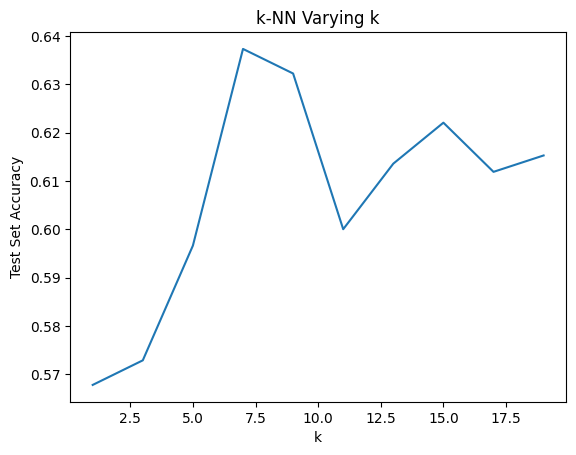

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### Gzip

    k  Test Set Accuracy
0   1           0.750000
1   3           0.833333
2   5           0.833333
3   7           0.791667
4   9           0.729167
5  11           0.770833
6  13           0.770833
7  15           0.750000
8  17           0.770833
9  19           0.770833
Best k value: 3
Accuracy on test set with best k: 0.8333333333333334


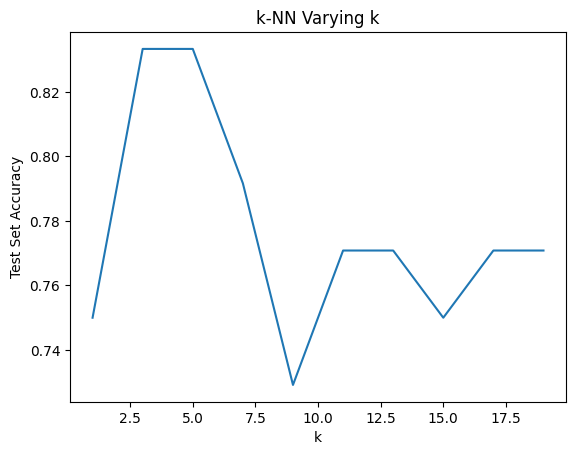

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### Brotli

    k  Test Set Accuracy
0   1           0.687500
1   3           0.729167
2   5           0.770833
3   7           0.791667
4   9           0.812500
5  11           0.833333
6  13           0.833333
7  15           0.833333
8  17           0.791667
9  19           0.770833
Best k value: 11
Accuracy on test set with best k: 0.8333333333333334


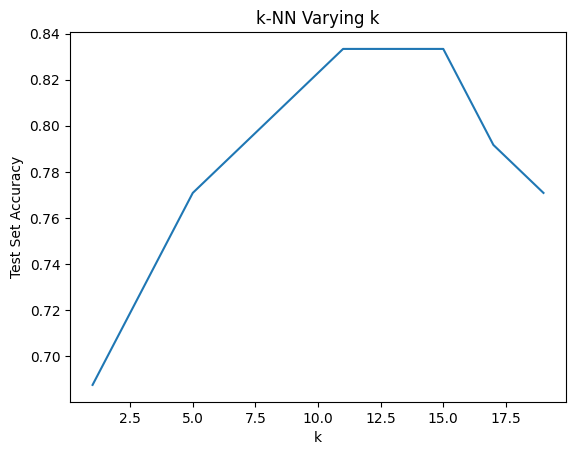

In [ ]:
import brotli
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

    k  Cross-Validation Accuracy
0   1                   0.694444
1   3                   0.694444
2   5                   0.759259
3   7                   0.722222
4   9                   0.685185
5  11                   0.657407
6  13                   0.657407
7  15                   0.648148
8  17                   0.685185
9  19                   0.648148
Best k value: 5


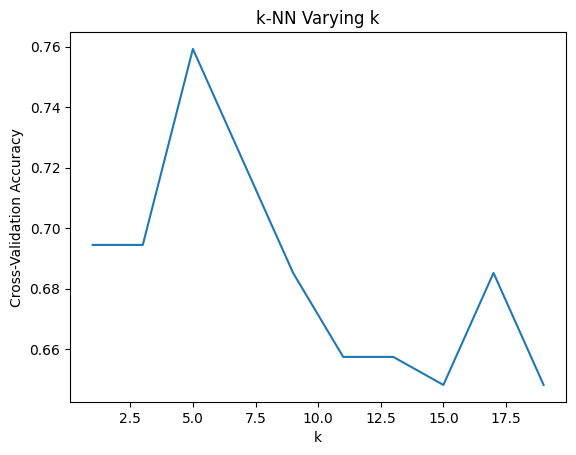

In [ ]:
def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

k_values = list(range(1, 20, 2))

cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)
    cv_accuracies.append(cv_scores.mean())

results_df = pd.DataFrame({
    'k': k_values,
    'Cross-Validation Accuracy': cv_accuracies
})

print(results_df)

best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

plt.plot(k_values, cv_accuracies)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Varying k')
plt.show()

### lz4

    k  Test Set Accuracy
0   1           0.708333
1   3           0.833333
2   5           0.854167
3   7           0.791667
4   9           0.791667
5  11           0.770833
6  13           0.770833
7  15           0.770833
8  17           0.770833
9  19           0.729167
Best k value: 5
Accuracy on test set with best k: 0.8541666666666666


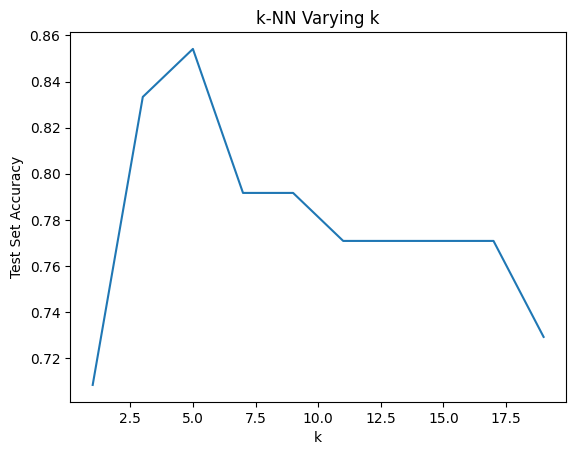

In [ ]:
import lz4.frame
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

    k  Cross-Validation Accuracy
0   1                   0.777778
1   3                   0.842593
2   5                   0.796296
3   7                   0.796296
4   9                   0.777778
5  11                   0.768519
6  13                   0.777778
7  15                   0.777778
8  17                   0.777778
9  19                   0.759259
Best k value: 3


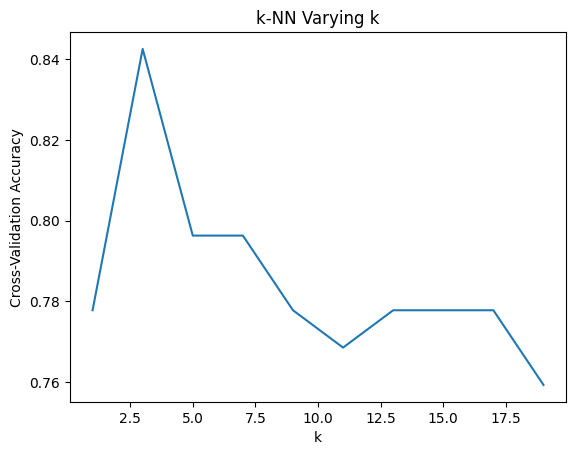

In [ ]:
import lz4.frame

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

k_values = list(range(1, 20, 2))

cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)
    cv_accuracies.append(cv_scores.mean())

results_df = pd.DataFrame({
    'k': k_values,
    'Cross-Validation Accuracy': cv_accuracies
})

print(results_df)

best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

plt.plot(k_values, cv_accuracies)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Varying k')
plt.show()

### LZMA

    k  Test Set Accuracy
0   1           0.729167
1   3           0.750000
2   5           0.729167
3   7           0.708333
4   9           0.729167
5  11           0.750000
6  13           0.729167
7  15           0.729167
8  17           0.687500
9  19           0.645833
Best k value: 3
Accuracy on test set with best k: 0.75


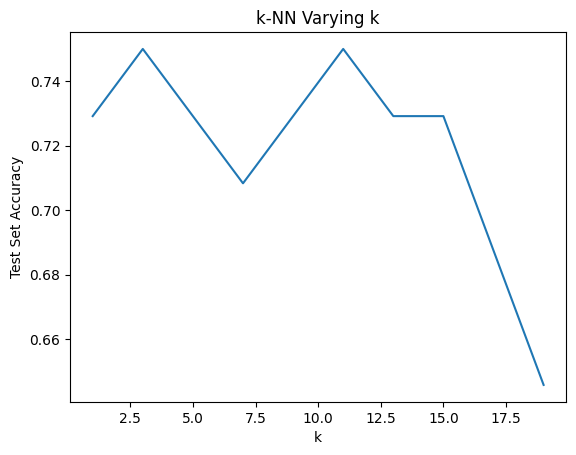

In [ ]:
import lzma
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

    k  Cross-Validation Accuracy
0   1                   0.768519
1   3                   0.805556
2   5                   0.824074
3   7                   0.805556
4   9                   0.759259
5  11                   0.694444
6  13                   0.694444
7  15                   0.685185
8  17                   0.703704
9  19                   0.629630
Best k value: 5


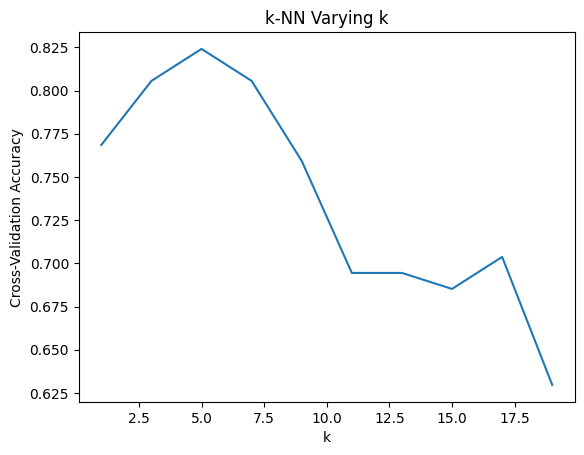

In [ ]:
import lzma

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

k_values = list(range(1, 20, 2))

cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)
    cv_accuracies.append(cv_scores.mean())

results_df = pd.DataFrame({
    'k': k_values,
    'Cross-Validation Accuracy': cv_accuracies
})

print(results_df)

best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

plt.plot(k_values, cv_accuracies)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Varying k')
plt.show()

### bz2

    k  Test Set Accuracy
0   1           0.812500
1   3           0.854167
2   5           0.833333
3   7           0.770833
4   9           0.812500
5  11           0.791667
6  13           0.812500
7  15           0.729167
8  17           0.708333
9  19           0.708333
Best k value: 3
Accuracy on test set with best k: 0.8541666666666666


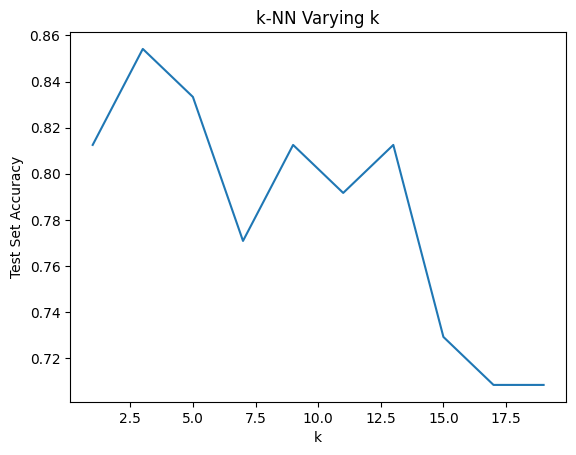

In [ ]:
import bz2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

    k  Cross-Validation Accuracy
0   1                   0.740741
1   3                   0.712963
2   5                   0.722222
3   7                   0.750000
4   9                   0.712963
5  11                   0.675926
6  13                   0.675926
7  15                   0.648148
8  17                   0.629630
9  19                   0.601852
Best k value: 7


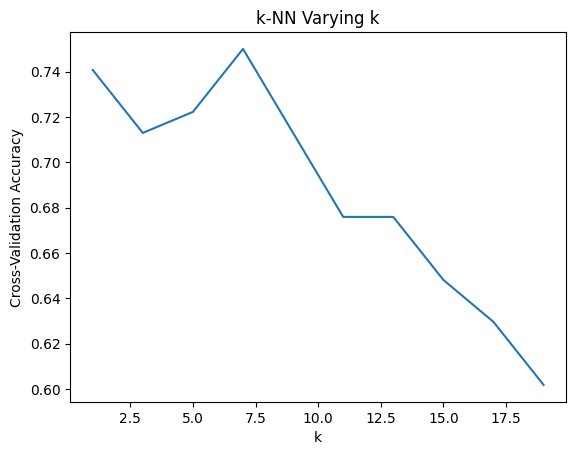

In [ ]:
import bz2

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

k_values = list(range(1, 20, 2))

cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)
    cv_accuracies.append(cv_scores.mean())

results_df = pd.DataFrame({
    'k': k_values,
    'Cross-Validation Accuracy': cv_accuracies
})

print(results_df)

best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

plt.plot(k_values, cv_accuracies)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Varying k')
plt.show()

### pysmaz

    k  Test Set Accuracy
0   1           0.645833
1   3           0.479167
2   5           0.500000
3   7           0.500000
4   9           0.520833
5  11           0.604167
6  13           0.583333
7  15           0.604167
8  17           0.583333
9  19           0.520833
Best k value: 1
Accuracy on test set with best k: 0.6458333333333334


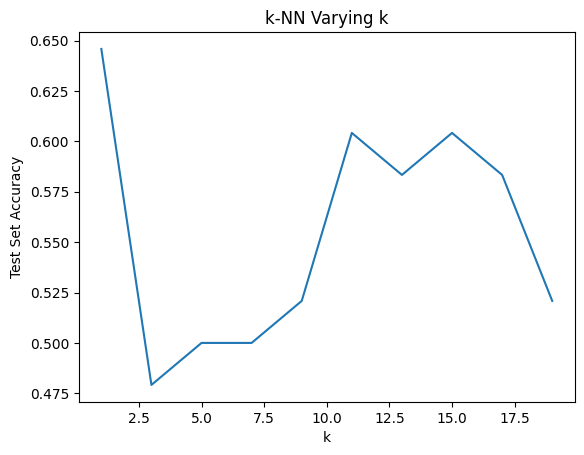

In [ ]:
import pysmaz
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

    k  Cross-Validation Accuracy
0   1                   0.537037
1   3                   0.435185
2   5                   0.453704
3   7                   0.444444
4   9                   0.509259
5  11                   0.500000
6  13                   0.527778
7  15                   0.546296
8  17                   0.546296
9  19                   0.537037
Best k value: 15


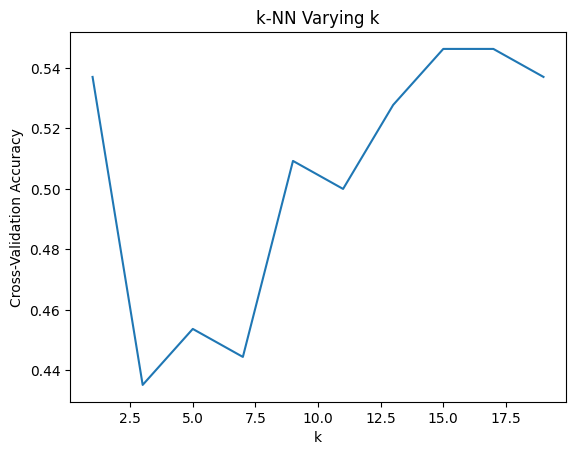

In [ ]:
import pysmaz

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

k_values = list(range(1, 20, 2))

cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)
    cv_accuracies.append(cv_scores.mean())

results_df = pd.DataFrame({
    'k': k_values,
    'Cross-Validation Accuracy': cv_accuracies
})

print(results_df)

best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

plt.plot(k_values, cv_accuracies)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Varying k')
plt.show()

### BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

vectorizer = CountVectorizer()

x_train_bow = vectorizer.fit_transform(x_train)

x_test_bow = vectorizer.transform(x_test)

model = MultinomialNB()
model.fit(x_train_bow, y_train)

y_pred = model.predict(x_test_bow)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.89      0.67      0.76        24

    accuracy                           0.79        48
   macro avg       0.81      0.79      0.79        48
weighted avg       0.81      0.79      0.79        48



In [ ]:
model = LogisticRegression()
model.fit(x_train_bow, y_train)

y_pred = model.predict(x_test_bow)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7291666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.74      0.71      0.72        24

    accuracy                           0.73        48
   macro avg       0.73      0.73      0.73        48
weighted avg       0.73      0.73      0.73        48



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x_train_bow, y_train)

y_pred_rf = rf_model.predict(x_test_bow)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8541666666666666
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.90      0.79      0.84        24

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48



    k  Test Set Accuracy
0   1           0.625000
1   3           0.520833
2   5           0.520833
3   7           0.583333
4   9           0.604167
5  11           0.604167
6  13           0.645833
7  15           0.645833
8  17           0.645833
9  19           0.666667
Best k value: 19
Accuracy on test set with best k: 0.6666666666666666


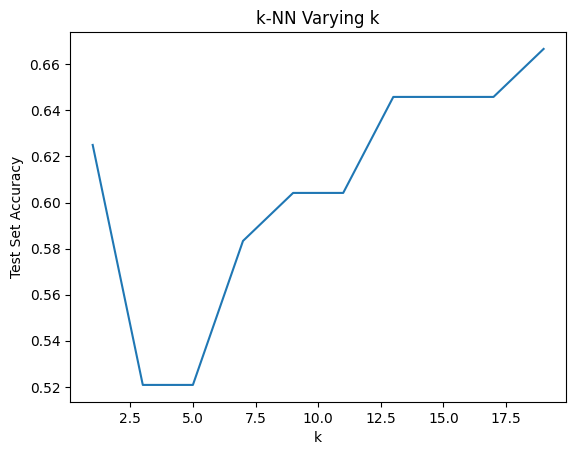

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()

x_train_bow = vectorizer.fit_transform(x_train).toarray()

x_test_bow = vectorizer.transform(x_test).toarray()

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.tobytes()))
    x2_compressed = len(gzip.compress(x2.tobytes()))
    xx2 = len(gzip.compress(x.tobytes() + x2.tobytes()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train_bow[i], x_train_bow[j]) for j in range(len(x_train_bow))] for i in range(len(x_train_bow))]

test_ncd = [[ncd(x_test_bow[i], x_train_bow[j]) for j in range(len(x_train_bow))] for i in range(len(x_test_bow))]

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

y_pred = model.predict(x_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7916666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.89      0.67      0.76        24

    accuracy                           0.79        48
   macro avg       0.81      0.79      0.79        48
weighted avg       0.81      0.79      0.79        48



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(x_train_tfidf, y_train)

y_pred_nb = nb_model.predict(x_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7708333333333334
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81        24
           1       0.93      0.58      0.72        24

    accuracy                           0.77        48
   macro avg       0.82      0.77      0.76        48
weighted avg       0.82      0.77      0.76        48



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x_train_tfidf, y_train)

y_pred_rf = rf_model.predict(x_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8333333333333334
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.90      0.75      0.82        24

    accuracy                           0.83        48
   macro avg       0.84      0.83      0.83        48
weighted avg       0.84      0.83      0.83        48



    k  Test Set Accuracy
0   1           0.479167
1   3           0.520833
2   5           0.500000
3   7           0.583333
4   9           0.541667
5  11           0.541667
6  13           0.583333
7  15           0.583333
8  17           0.583333
9  19           0.625000
Best k value: 19
Accuracy on test set with best k: 0.625


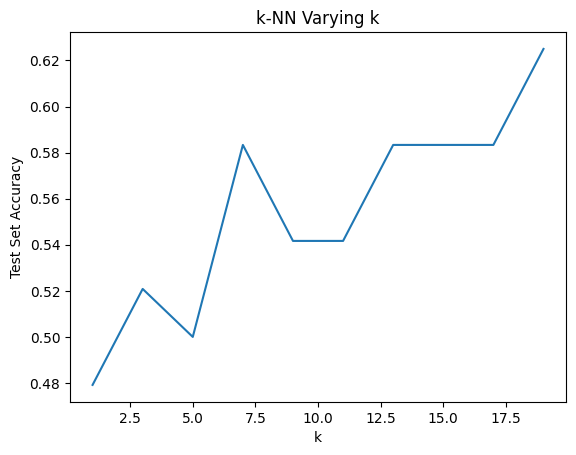

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(max_features=5000)

x_train_tfidf = vectorizer.fit_transform(x_train).toarray()

x_test_tfidf = vectorizer.transform(x_test).toarray()

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.tobytes()))
    x2_compressed = len(gzip.compress(x2.tobytes()))
    xx2 = len(gzip.compress(x.tobytes() + x2.tobytes()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train_tfidf[i], x_train_tfidf[j]) for j in range(len(x_train_tfidf))] for i in range(len(x_train_tfidf))])

test_ncd = np.array([[ncd(x_test_tfidf[i], x_train_tfidf[j]) for j in range(len(x_train_tfidf))] for i in range(len(x_test_tfidf))])

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k, metric='precomputed')
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### Word2Vec

In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

word2vec_model = Word2Vec(sentences=x_train, vector_size=100, window=5, min_count=1, workers=4)

def document_embedding(doc, model):
    embeddings = [model.wv[word] for word in doc if word in model.wv]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

x_train_embeddings = np.array([document_embedding(doc, word2vec_model) for doc in x_train])
x_test_embeddings = np.array([document_embedding(doc, word2vec_model) for doc in x_test])

classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train_embeddings, y_train)

y_pred = classifier.predict(x_test_embeddings)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7291666666666666


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(x_train_embeddings, y_train)

y_pred_nb = nb_model.predict(x_test_embeddings)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes (Gaussian) Accuracy: {accuracy_nb}")

Naive Bayes (Gaussian) Accuracy: 0.7291666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x_train_embeddings, y_train)

y_pred_rf = rf_model.predict(x_test_embeddings)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8125


    k  Test Set Accuracy
0   1           0.583333
1   3           0.583333
2   5           0.604167
3   7           0.562500
4   9           0.541667
5  11           0.562500
6  13           0.583333
7  15           0.520833
8  17           0.541667
9  19           0.541667
Best k value: 5
Accuracy on test set with best k: 0.6041666666666666


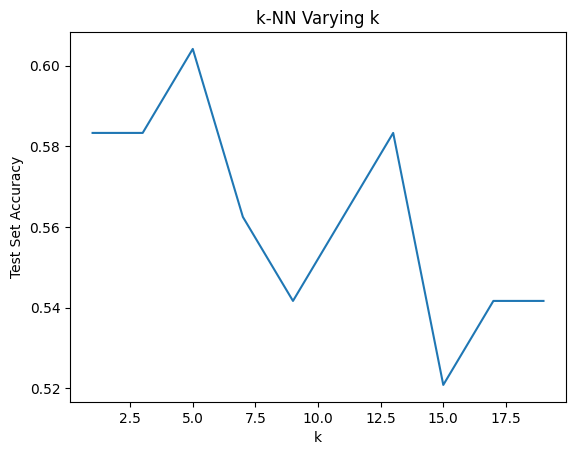

In [ ]:
import gzip
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

word2vec_model = Word2Vec(sentences=x_train, vector_size=100, window=5, min_count=1, workers=4)

def document_embedding(doc, model):
    embeddings = [model.wv[word] for word in doc if word in model.wv]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

x_train_embeddings = np.array([document_embedding(doc, word2vec_model) for doc in x_train])
x_test_embeddings = np.array([document_embedding(doc, word2vec_model) for doc in x_test])

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.tobytes()))
    x2_compressed = len(gzip.compress(x2.tobytes()))
    xx2 = len(gzip.compress(x.tobytes() + x2.tobytes()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train_embeddings[i], x_train_embeddings[j]) for j in range(len(x_train_embeddings))] for i in range(len(x_train_embeddings))])

test_ncd = np.array([[ncd(x_test_embeddings[i], x_train_embeddings[j]) for j in range(len(x_train_embeddings))] for i in range(len(x_test_embeddings))])

k_values = list(range(1, 20, 2))

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

print(results_df)

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

neigh = KNeighborsClassifier(n_neighbors=best_k, metric='precomputed')
neigh.fit(train_ncd, y_train)

accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()


### Sequence Length

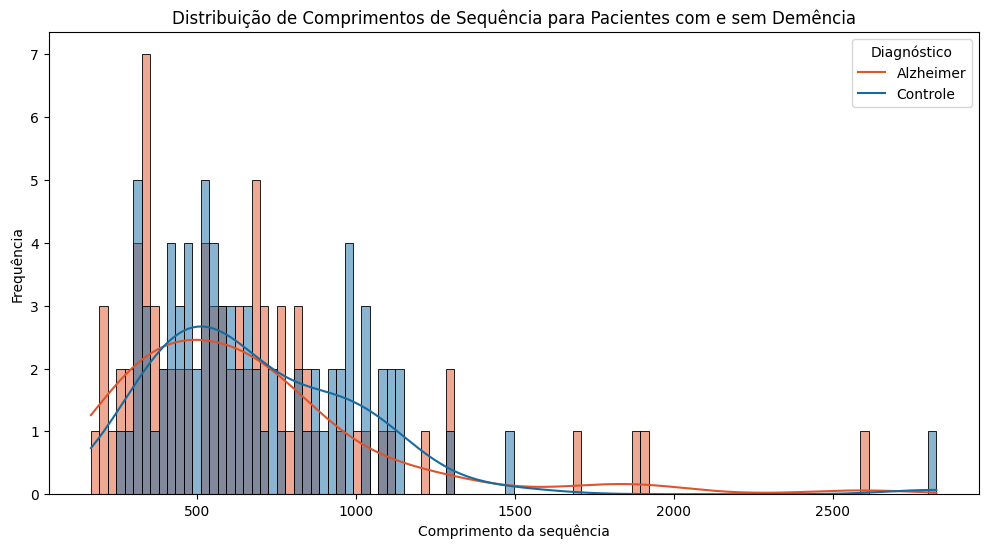

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_sequence_length_distribution(x_train, x_test, y_train, y_test, colors):
    x_all = x_train + x_test
    y_all = y_train + y_test

    seq_lengths = [len(seq) for seq in x_all]

    data = pd.DataFrame({
        'Sequence Length': seq_lengths,
        'Diagnosis': ['Alzheimer' if label == 1 else 'No Alzheimer' for label in y_all]
    })

    plt.figure(figsize=(12, 6))
    plot = sns.histplot(data=data, x='Sequence Length', hue='Diagnosis', kde=True, bins=100, palette=colors)
    plt.title('Distribuição de Comprimentos de Sequência para Pacientes com e sem Demência')
    plt.xlabel('Comprimento da sequência')
    plt.ylabel('Frequência')

    plt.legend(title='Diagnóstico', labels=['Alzheimer', 'Controle'])
    plt.show()

colors = ['#176BA0', '#DE542C']
plot_sequence_length_distribution(x_train, x_test, y_train, y_test, colors)

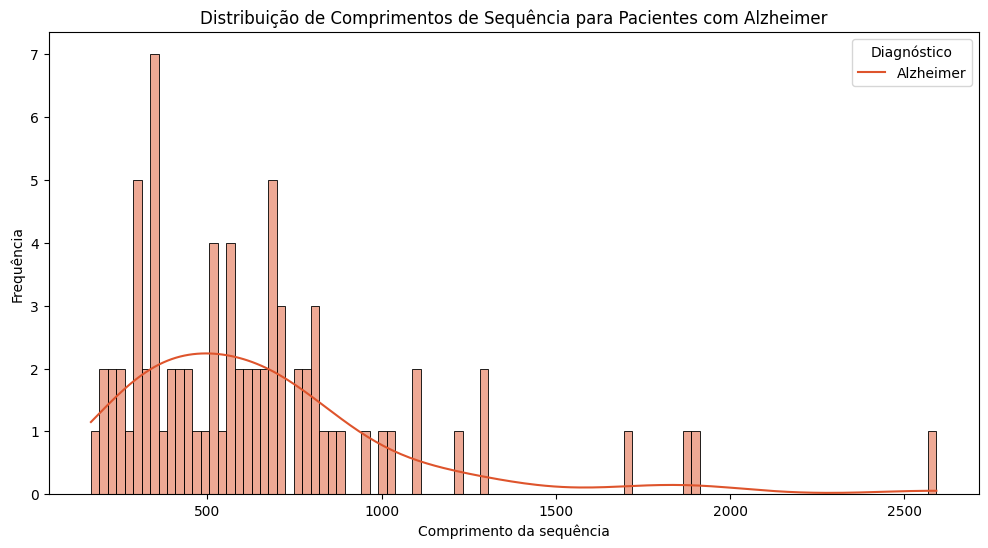

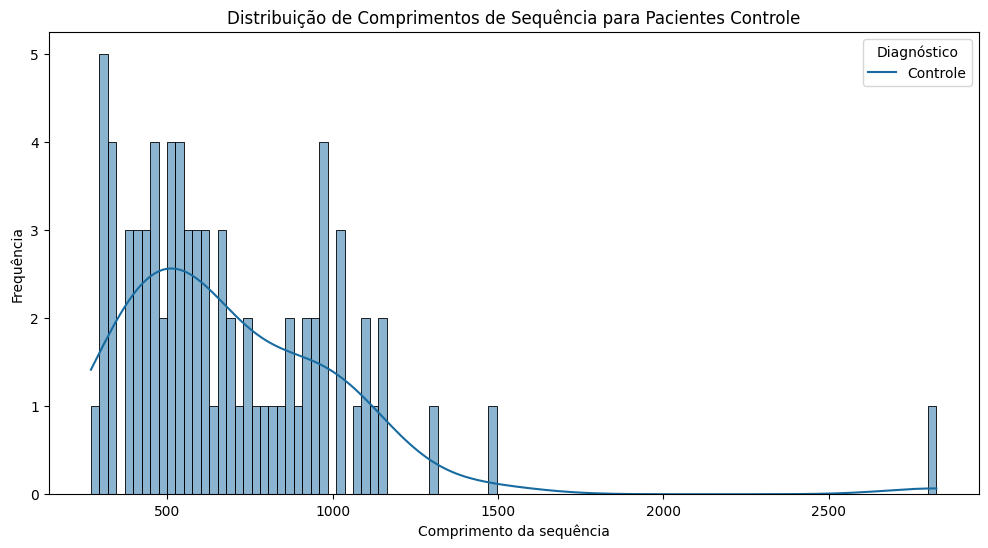

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_sequence_length_distribution(x_train, x_test, y_train, y_test, diagnosis_filter=None, color=None):
    x_all = x_train + x_test
    y_all = y_train + y_test

    seq_lengths = [len(seq) for seq in x_all]

    data = pd.DataFrame({
        'Sequence Length': seq_lengths,
        'Diagnosis': ['Alzheimer' if label == 1 else 'No Alzheimer' for label in y_all]
    })

    if diagnosis_filter:
        data = data[data['Diagnosis'] == diagnosis_filter]

    plt.figure(figsize=(12, 6))
    plot = sns.histplot(data=data, x='Sequence Length', kde=True, bins=100, color=color)
    
    if diagnosis_filter == 'Alzheimer':
        title = 'Distribuição de Comprimentos de Sequência para Pacientes com Alzheimer'
        plt.legend(title='Diagnóstico', labels=['Alzheimer'])
    else:
        title = 'Distribuição de Comprimentos de Sequência para Pacientes Controle'
        plt.legend(title='Diagnóstico', labels=['Controle'])
    
    plt.title(title)
    plt.xlabel('Comprimento da sequência')
    plt.ylabel('Frequência')
    plt.show()

plot_sequence_length_distribution(x_train, x_test, y_train, y_test, diagnosis_filter='Alzheimer', color='#DE542C')

plot_sequence_length_distribution(x_train, x_test, y_train, y_test, diagnosis_filter='No Alzheimer', color='#176BA0')

### Spectrograms

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

def generate_and_save_spectrograms(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            filepath = os.path.join(directory, filename)
            y, sr = librosa.load(filepath)
            
            S = librosa.stft(y)
            S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
            
            output_filename = os.path.splitext(filename)[0] + ".csv"
            output_filepath = os.path.join(directory, output_filename)
            
            df = pd.DataFrame(S_db)
            
            df.to_csv(output_filepath, index=False)

directory = "train_negative_dir"
generate_and_save_spectrograms(directory)

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def generate_and_save_spectrograms(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            filepath = os.path.join(directory, filename)
            y, sr = librosa.load(filepath)
            
            S = librosa.stft(y)
            S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
            
            output_filename = os.path.splitext(filename)[0] + ".png"
            output_filepath = os.path.join(directory, output_filename)
            
            plt.figure()
            librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='viridis')
            plt.axis('off')
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
            plt.margins(0, 0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.savefig(output_filepath, bbox_inches='tight', pad_inches=0)
            plt.close()

directory = "train_positive_dir"
generate_and_save_spectrograms(directory)

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def generate_and_save_spectrograms(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            filepath = os.path.join(directory, filename)
            y, sr = librosa.load(filepath)
            
            S = librosa.stft(y)
            S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
            
            output_filename = os.path.splitext(filename)[0] + ".png"
            output_filepath = os.path.join(directory, output_filename)
            
            plt.figure()
            librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='viridis')
            plt.axis('off')
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
            plt.margins(0, 0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.savefig(output_filepath, bbox_inches='tight', pad_inches=0)
            plt.close()

directory = "test_dir"
generate_and_save_spectrograms(directory)

### Results by patients

In [ ]:
import os
import chardet
import re
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=5, metric='precomputed')

knn.fit(train_ncd, y_train)

train_predictions = knn.predict(train_ncd)

predictions_df = pd.DataFrame({
    'Filename': filenames_train,
    'Prediction': train_predictions
})

print(predictions_df)

predictions_df.to_csv('train_predictions.csv', index=False)

print("Train predictions saved to train_predictions.csv")

cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)

print(f"Cross-Validation Accuracy for k=5: {cv_scores.mean()}")

     Filename  Prediction
0    S001.cha           0
1    S002.cha           0
2    S003.cha           0
3    S004.cha           0
4    S005.cha           0
..        ...         ...
103  S150.cha           1
104  S151.cha           1
105  S153.cha           1
106  S154.cha           1
107  S156.cha           1

[108 rows x 2 columns]
Train predictions saved to train_predictions.csv
Cross-Validation Accuracy for k=5: 0.8055555555555556


In [ ]:
import os
import chardet
import re
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_ncd, y_train)

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

test_predictions = knn.predict(test_ncd)

accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy for k=5: {accuracy}")

test_predictions_df = pd.DataFrame({
    'Filename': filenames_test,
    'Prediction': test_predictions,
    'True Label': y_test
})

print(test_predictions_df)

test_predictions_df.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to test_predictions.csv")

Test Accuracy for k=5: 0.8333333333333334
    Filename  Prediction  True Label
0   S160.cha           0           0
1   S161.cha           0           0
2   S162.cha           0           1
3   S163.cha           0           0
4   S164.cha           1           1
5   S165.cha           1           1
6   S166.cha           1           0
7   S167.cha           1           1
8   S168.cha           1           1
9   S169.cha           1           1
10  S170.cha           1           0
11  S171.cha           1           1
12  S172.cha           0           0
13  S173.cha           1           1
14  S174.cha           0           0
15  S175.cha           0           0
16  S176.cha           1           1
17  S177.cha           0           0
18  S178.cha           0           0
19  S179.cha           1           1
20  S180.cha           0           0
21  S181.cha           1           1
22  S182.cha           1           1
23  S183.cha           0           0
24  S184.cha           0         

In [ ]:
def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_ncd, y_train)

train_predictions = knn.predict(train_ncd)

predictions_df = pd.DataFrame({
    'Filename': filenames_train,
    'Prediction': train_predictions
})

print(predictions_df)

predictions_df.to_csv('train_predictions.csv', index=False)

print("Train predictions saved to train_predictions.csv")

cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)

print(f"Cross-Validation Accuracy for k=5: {cv_scores.mean()}")

     Filename  Prediction
0    S001.cha           0
1    S002.cha           0
2    S003.cha           0
3    S004.cha           0
4    S005.cha           0
..        ...         ...
103  S150.cha           1
104  S151.cha           1
105  S153.cha           1
106  S154.cha           0
107  S156.cha           1

[108 rows x 2 columns]
Train predictions saved to train_predictions.csv
Cross-Validation Accuracy for k=5: 0.7592592592592593


In [ ]:
import os
import chardet
import re
import brotli
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_ncd, y_train)

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

test_predictions = knn.predict(test_ncd)

accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy for k=5: {accuracy}")

test_predictions_df = pd.DataFrame({
    'Filename': filenames_test,
    'Prediction': test_predictions,
    'True Label': y_test
})

print(test_predictions_df)

test_predictions_df.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to test_predictions.csv")

Test Accuracy for k=5: 0.7708333333333334
    Filename  Prediction  True Label
0   S160.cha           0           0
1   S161.cha           0           0
2   S162.cha           0           1
3   S163.cha           0           0
4   S164.cha           1           1
5   S165.cha           1           1
6   S166.cha           1           0
7   S167.cha           1           1
8   S168.cha           1           1
9   S169.cha           1           1
10  S170.cha           1           0
11  S171.cha           1           1
12  S172.cha           0           0
13  S173.cha           0           1
14  S174.cha           0           0
15  S175.cha           0           0
16  S176.cha           1           1
17  S177.cha           0           0
18  S178.cha           0           0
19  S179.cha           0           1
20  S180.cha           0           0
21  S181.cha           1           1
22  S182.cha           1           1
23  S183.cha           0           0
24  S184.cha           0         

In [ ]:
def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_ncd, y_train)

train_predictions = knn.predict(train_ncd)

predictions_df = pd.DataFrame({
    'Filename': filenames_train,
    'Prediction': train_predictions
})

print(predictions_df)

predictions_df.to_csv('train_predictions.csv', index=False)

print("Train predictions saved to train_predictions.csv")

cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)

print(f"Cross-Validation Accuracy for k=3: {cv_scores.mean()}")

     Filename  Prediction
0    S001.cha           0
1    S002.cha           0
2    S003.cha           0
3    S004.cha           0
4    S005.cha           0
..        ...         ...
103  S150.cha           1
104  S151.cha           1
105  S153.cha           1
106  S154.cha           1
107  S156.cha           1

[108 rows x 2 columns]
Train predictions saved to train_predictions.csv
Cross-Validation Accuracy for k=3: 0.8425925925925926


In [ ]:
import os
import chardet
import re
import lz4.frame
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_ncd, y_train)

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

test_predictions = knn.predict(test_ncd)

accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy for k=5: {accuracy}")

test_predictions_df = pd.DataFrame({
    'Filename': filenames_test,
    'Prediction': test_predictions,
    'True Label': y_test
})

print(test_predictions_df)

test_predictions_df.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to test_predictions.csv")

Test Accuracy for k=5: 0.8333333333333334
    Filename  Prediction  True Label
0   S160.cha           0           0
1   S161.cha           0           0
2   S162.cha           0           1
3   S163.cha           0           0
4   S164.cha           1           1
5   S165.cha           1           1
6   S166.cha           1           0
7   S167.cha           1           1
8   S168.cha           0           1
9   S169.cha           1           1
10  S170.cha           1           0
11  S171.cha           1           1
12  S172.cha           0           0
13  S173.cha           0           1
14  S174.cha           0           0
15  S175.cha           0           0
16  S176.cha           1           1
17  S177.cha           0           0
18  S178.cha           0           0
19  S179.cha           1           1
20  S180.cha           0           0
21  S181.cha           1           1
22  S182.cha           1           1
23  S183.cha           0           0
24  S184.cha           0         

In [ ]:
def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_ncd, y_train)

train_predictions = knn.predict(train_ncd)

predictions_df = pd.DataFrame({
    'Filename': filenames_train,
    'Prediction': train_predictions
})

print(predictions_df)

predictions_df.to_csv('train_predictions.csv', index=False)

print("Train predictions saved to train_predictions.csv")

cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)

print(f"Cross-Validation Accuracy for k=5: {cv_scores.mean()}")

     Filename  Prediction
0    S001.cha           0
1    S002.cha           0
2    S003.cha           0
3    S004.cha           1
4    S005.cha           0
..        ...         ...
103  S150.cha           1
104  S151.cha           1
105  S153.cha           1
106  S154.cha           1
107  S156.cha           1

[108 rows x 2 columns]
Train predictions saved to train_predictions.csv
Cross-Validation Accuracy for k=5: 0.8240740740740741


In [ ]:
import os
import chardet
import re
import lzma
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_ncd, y_train)

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

test_predictions = knn.predict(test_ncd)

accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy for k=5: {accuracy}")

test_predictions_df = pd.DataFrame({
    'Filename': filenames_test,
    'Prediction': test_predictions,
    'True Label': y_test
})

print(test_predictions_df)

test_predictions_df.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to test_predictions.csv")

Test Accuracy for k=5: 0.7291666666666666
    Filename  Prediction  True Label
0   S160.cha           0           0
1   S161.cha           0           0
2   S162.cha           1           1
3   S163.cha           0           0
4   S164.cha           1           1
5   S165.cha           1           1
6   S166.cha           1           0
7   S167.cha           1           1
8   S168.cha           0           1
9   S169.cha           0           1
10  S170.cha           1           0
11  S171.cha           1           1
12  S172.cha           0           0
13  S173.cha           0           1
14  S174.cha           0           0
15  S175.cha           0           0
16  S176.cha           1           1
17  S177.cha           0           0
18  S178.cha           0           0
19  S179.cha           0           1
20  S180.cha           0           0
21  S181.cha           1           1
22  S182.cha           1           1
23  S183.cha           0           0
24  S184.cha           0         

In [ ]:
def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(train_ncd, y_train)

train_predictions = knn.predict(train_ncd)

predictions_df = pd.DataFrame({
    'Filename': filenames_train,
    'Prediction': train_predictions
})

print(predictions_df)

predictions_df.to_csv('train_predictions.csv', index=False)

print("Train predictions saved to train_predictions.csv")

cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)

print(f"Cross-Validation Accuracy for k=7: {cv_scores.mean()}")

     Filename  Prediction
0    S001.cha           0
1    S002.cha           0
2    S003.cha           0
3    S004.cha           0
4    S005.cha           0
..        ...         ...
103  S150.cha           1
104  S151.cha           1
105  S153.cha           1
106  S154.cha           1
107  S156.cha           1

[108 rows x 2 columns]
Train predictions saved to train_predictions.csv
Cross-Validation Accuracy for k=7: 0.75


In [ ]:
import os
import chardet
import re
import bz2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(train_ncd, y_train)

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

test_predictions = knn.predict(test_ncd)

accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy for k=5: {accuracy}")

test_predictions_df = pd.DataFrame({
    'Filename': filenames_test,
    'Prediction': test_predictions,
    'True Label': y_test
})

print(test_predictions_df)

test_predictions_df.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to test_predictions.csv")

Test Accuracy for k=5: 0.7708333333333334
    Filename  Prediction  True Label
0   S160.cha           1           0
1   S161.cha           0           0
2   S162.cha           0           1
3   S163.cha           0           0
4   S164.cha           0           1
5   S165.cha           1           1
6   S166.cha           1           0
7   S167.cha           1           1
8   S168.cha           1           1
9   S169.cha           1           1
10  S170.cha           1           0
11  S171.cha           1           1
12  S172.cha           0           0
13  S173.cha           1           1
14  S174.cha           0           0
15  S175.cha           1           0
16  S176.cha           1           1
17  S177.cha           0           0
18  S178.cha           0           0
19  S179.cha           1           1
20  S180.cha           0           0
21  S181.cha           1           1
22  S182.cha           1           1
23  S183.cha           0           0
24  S184.cha           0         

In [ ]:
def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(train_ncd, y_train)

train_predictions = knn.predict(train_ncd)

predictions_df = pd.DataFrame({
    'Filename': filenames_train,
    'Prediction': train_predictions
})

print(predictions_df)

predictions_df.to_csv('train_predictions.csv', index=False)

print("Train predictions saved to train_predictions.csv")

cv_scores = cross_val_score(knn, train_ncd, y_train, cv=2)

print(f"Cross-Validation Accuracy for k=15: {cv_scores.mean()}")

     Filename  Prediction
0    S001.cha           0
1    S002.cha           0
2    S003.cha           0
3    S004.cha           1
4    S005.cha           0
..        ...         ...
103  S150.cha           0
104  S151.cha           1
105  S153.cha           1
106  S154.cha           0
107  S156.cha           0

[108 rows x 2 columns]
Train predictions saved to train_predictions.csv
Cross-Validation Accuracy for k=15: 0.5462962962962963


In [ ]:
import os
import chardet
import re
import pysmaz
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(train_ncd, y_train)

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

test_predictions = knn.predict(test_ncd)

accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy for k=5: {accuracy}")

test_predictions_df = pd.DataFrame({
    'Filename': filenames_test,
    'Prediction': test_predictions,
    'True Label': y_test
})

print(test_predictions_df)

test_predictions_df.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to test_predictions.csv")

Test Accuracy for k=5: 0.6041666666666666
    Filename  Prediction  True Label
0   S160.cha           1           0
1   S161.cha           1           0
2   S162.cha           1           1
3   S163.cha           0           0
4   S164.cha           0           1
5   S165.cha           0           1
6   S166.cha           0           0
7   S167.cha           1           1
8   S168.cha           0           1
9   S169.cha           1           1
10  S170.cha           0           0
11  S171.cha           0           1
12  S172.cha           0           0
13  S173.cha           1           1
14  S174.cha           0           0
15  S175.cha           0           0
16  S176.cha           0           1
17  S177.cha           0           0
18  S178.cha           0           0
19  S179.cha           0           1
20  S180.cha           0           0
21  S181.cha           0           1
22  S182.cha           1           1
23  S183.cha           0           0
24  S184.cha           0         

### Save dataset to text

In [ ]:
import os
import chardet
import re
import pysmaz
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

with open('train_texts.txt', 'w', encoding='utf-8') as f:
    for text in x_train:
        f.write(text + '\n')

with open('train_labels.txt', 'w', encoding='utf-8') as f:
    for label in y_train:
        f.write(str(label) + '\n')

test_dir = "test_dir"

x_test, filenames_test, _ = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

with open('test_texts.txt', 'w', encoding='utf-8') as f:
    for text in x_test:
        f.write(text + '\n')

with open('test_labels.txt', 'w', encoding='utf-8') as f:
    for label in y_test:
        f.write(str(label) + '\n')

# Publication

## Text Classification

### gzip_loso_holdout

In [23]:
import os
import chardet
import re
import gzip
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)
x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [27]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=3: 0.8333333333333334
Precision for Alzheimer (Class 1) for k=3: 0.8636363636363636
Precision for Control (Class 0) for k=3: 0.8076923076923077
Total TP: 19,  FN: 5, FP: 3, TN: 21


In [4]:
import os
import chardet
import re
import gzip
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def load_texts_from_directory(directory):
    texts = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
    return texts, filenames

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"
test_dir = "test_dir"

positive_texts, _ = load_texts_from_directory(positive_dir)
negative_texts, _ = load_texts_from_directory(negative_dir)
x_train = positive_texts + negative_texts
y_train = [1] * len(positive_texts) + [0] * len(negative_texts)

x_test, filenames_test = load_texts_from_directory(test_dir)
x_test = [x for _, x in sorted(zip(filenames_test, x_test))]
y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

x_data = x_train + x_test
y_data = y_train + y_test

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=

### brotli_loso_holdout

In [28]:
import os
import chardet
import re
import brotli
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)
x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [32]:
import brotli
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 1

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=1: 0.6875
Precision for Alzheimer (Class 1) for k=1: 0.6956521739130435
Precision for Control (Class 0) for k=1: 0.68
Total TP: 16,  FN: 8, FP: 7, TN: 17


In [6]:
import brotli

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 12 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### lz4_loso_holdout

In [33]:
import os
import chardet
import re
import lz4.frame
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)
x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [35]:
import lz4.frame
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=5: 0.8541666666666666
Precision for Alzheimer (Class 1) for k=5: 0.8695652173913043
Precision for Control (Class 0) for k=5: 0.84
Total TP: 20,  FN: 4, FP: 3, TN: 21


In [7]:
import lz4.frame

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### lzma_loso_holdout

In [36]:
import os
import chardet
import re
import lzma
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)
x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [37]:
import lzma
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)

Accuracy on test set with k=5: 0.75
Precision for Alzheimer (Class 1) for k=5: 0.7727272727272727
Precision for Control (Class 0) for k=5: 0.7307692307692307
Total TP: 17,  FN: 7, FP: 5, TN: 19


In [8]:
import lzma

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### bz2_loso_holdout

In [38]:
import os
import chardet
import re
import bz2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [40]:
import bz2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]

precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=3: 0.8125
Precision for Alzheimer (Class 1) for k=3: 0.8571428571428571
Precision for Control (Class 0) for k=3: 0.7777777777777778
Total TP: 18,  FN: 6, FP: 3, TN: 21


In [9]:
import bz2

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### pysmaz_loso_holdout

In [41]:
import os
import chardet
import re
import pysmaz
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [46]:
import pysmaz
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 1

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=1: 0.6666666666666666
Precision for Alzheimer (Class 1) for k=1: 0.75
Precision for Control (Class 0) for k=1: 0.625
Total TP: 12,  FN: 12, FP: 4, TN: 20


In [10]:
import pysmaz

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 14 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### fpzip_loso_houldout

In [47]:
import os
import chardet
import re
import fpzip
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

def text_to_float_array(text):
    return np.array([ord(c) for c in text], dtype=np.float32)

def ncd(x, x2):
    x_array = text_to_float_array(x)
    x2_array = text_to_float_array(x2)
    
    x_compressed = len(fpzip.compress(x_array))
    x2_compressed = len(fpzip.compress(x2_array))
    xx2_array = text_to_float_array(" ".join([x, x2]))
    xx2_compressed = len(fpzip.compress(xx2_array))
    
    return (xx2_compressed - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [51]:
import fpzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def text_to_float_array(text):
    return np.array([ord(c) for c in text], dtype=np.float32)
    
def ncd(x, x2):
    x_array = text_to_float_array(x)
    x2_array = text_to_float_array(x2)

    x_compressed = len(fpzip.compress(x_array))
    x2_compressed = len(fpzip.compress(x2_array))
    xx2_array = text_to_float_array(" ".join([x, x2]))
    xx2_compressed = len(fpzip.compress(xx2_array))
    
    return (xx2_compressed - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=3: 0.7083333333333334
Precision for Alzheimer (Class 1) for k=3: 0.6923076923076923
Precision for Control (Class 0) for k=3: 0.7272727272727273
Total TP: 18,  FN: 6, FP: 8, TN: 16


In [12]:
import fpzip

def text_to_float_array(text):
    return np.array([ord(c) for c in text], dtype=np.float32)
    
def ncd(x, x2):
    x_array = text_to_float_array(x)
    x2_array = text_to_float_array(x2)

    x_compressed = len(fpzip.compress(x_array))
    x2_compressed = len(fpzip.compress(x2_array))
    xx2_array = text_to_float_array(" ".join([x, x2]))
    xx2_compressed = len(fpzip.compress(xx2_array))
    
    return (xx2_compressed - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 7 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=

### snappy_loso_holdout

In [54]:
import os
import chardet
import re
import snappy
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def ncd(x, x2):
    x_compressed = len(snappy.compress(x.encode()))
    x2_compressed = len(snappy.compress(x2.encode()))
    xx2 = len(snappy.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [56]:
import snappy
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(snappy.compress(x.encode()))
    x2_compressed = len(snappy.compress(x2.encode()))
    xx2 = len(snappy.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=5: 0.8125
Precision for Alzheimer (Class 1) for k=5: 0.8260869565217391
Precision for Control (Class 0) for k=5: 0.8
Total TP: 19,  FN: 5, FP: 4, TN: 20


In [13]:
import snappy

def ncd(x, x2):
    x_compressed = len(snappy.compress(x.encode()))
    x2_compressed = len(snappy.compress(x2.encode()))
    xx2 = len(snappy.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### huffman_loso_holdout

In [58]:
from pybcl import huffman_compress
import os
import chardet
import re
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def ncd(x, x2):
    x_compressed = len(huffman_compress(x.encode()))
    x2_compressed = len(huffman_compress(x2.encode()))
    xx2 = len(huffman_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [60]:
from pybcl import huffman_compress
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(huffman_compress(x.encode()))
    x2_compressed = len(huffman_compress(x2.encode()))
    xx2 = len(huffman_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=3: 0.6875
Precision for Alzheimer (Class 1) for k=3: 0.6551724137931034
Precision for Control (Class 0) for k=3: 0.7368421052631579
Total TP: 19,  FN: 5, FP: 10, TN: 14


In [14]:
from pybcl import huffman_compress

def ncd(x, x2):
    x_compressed = len(huffman_compress(x.encode()))
    x2_compressed = len(huffman_compress(x2.encode()))
    xx2 = len(huffman_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 14 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=

### lz77_loso_holdout

In [62]:
import os
import chardet
import re
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from pybcl import lz_compress_fast

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(lz_compress_fast(x.encode()))
    x2_compressed = len(lz_compress_fast(x2.encode()))
    xx2 = len(lz_compress_fast((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [63]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from pybcl import lz_compress_fast

def ncd(x, x2):
    x_compressed = len(lz_compress_fast(x.encode()))
    x2_compressed = len(lz_compress_fast(x2.encode()))
    xx2 = len(lz_compress_fast((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=5: 0.7708333333333334
Precision for Alzheimer (Class 1) for k=5: 0.8823529411764706
Precision for Control (Class 0) for k=5: 0.7096774193548387
Total TP: 15,  FN: 9, FP: 2, TN: 22


In [15]:
from pybcl import lz_compress_fast

def ncd(x, x2):
    x_compressed = len(lz_compress_fast(x.encode()))
    x2_compressed = len(lz_compress_fast(x2.encode()))
    xx2 = len(lz_compress_fast((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### rice_loso_holdout

In [65]:
import os
import chardet
import re
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from pybcl import rice_compress, RiceFormat

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(rice_compress(x.encode(), RiceFormat.UINT8))
    x2_compressed = len(rice_compress(x2.encode(), RiceFormat.UINT8))
    xx2 = len(rice_compress((" ".join([x, x2])).encode(), RiceFormat.UINT8))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 9 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=

In [67]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from pybcl import rice_compress, RiceFormat

def ncd(x, x2):
    x_compressed = len(rice_compress(x.encode(), RiceFormat.UINT8))
    x2_compressed = len(rice_compress(x2.encode(), RiceFormat.UINT8))
    xx2 = len(rice_compress((" ".join([x, x2])).encode(), RiceFormat.UINT8))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 1

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=1: 0.5833333333333334
Precision for Alzheimer (Class 1) for k=1: 0.5769230769230769
Precision for Control (Class 0) for k=1: 0.5909090909090909
Total TP: 15,  FN: 9, FP: 11, TN: 13


In [16]:
from pybcl import rice_compress, RiceFormat

def ncd(x, x2):
    x_compressed = len(rice_compress(x.encode(), RiceFormat.UINT8))
    x2_compressed = len(rice_compress(x2.encode(), RiceFormat.UINT8))
    xx2 = len(rice_compress((" ".join([x, x2])).encode(), RiceFormat.UINT8))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### rle_loso_holdout

In [69]:
from pybcl import rle_compress
import os
import chardet
import re
import gzip
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_score

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)
x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(rle_compress(x.encode()))
    x2_compressed = len(rle_compress(x2.encode()))
    xx2 = len(rle_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [70]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from pybcl import rle_compress

def ncd(x, x2):
    x_compressed = len(rle_compress(x.encode()))
    x2_compressed = len(rle_compress(x2.encode()))
    xx2 = len(rle_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 1

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=1: 0.5
Precision for Alzheimer (Class 1) for k=1: 0.0
Precision for Control (Class 0) for k=1: 0.5
Total TP: 0,  FN: 24, FP: 0, TN: 24


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from pybcl import rle_compress

def ncd(x, x2):
    x_compressed = len(rle_compress(x.encode()))
    x2_compressed = len(rle_compress(x2.encode()))
    xx2 = len(rle_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

### sf_loso_holdout

In [71]:
import os
import chardet
import re
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from pybcl import sf_compress

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    x_compressed = len(sf_compress(x.encode()))
    x2_compressed = len(sf_compress(x2.encode()))
    xx2 = len(sf_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 11 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 12 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [72]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from pybcl import sf_compress

def ncd(x, x2):
    x_compressed = len(sf_compress(x.encode()))
    x2_compressed = len(sf_compress(x2.encode()))
    xx2 = len(sf_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 1

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=1: 0.7083333333333334
Precision for Alzheimer (Class 1) for k=1: 0.75
Precision for Control (Class 0) for k=1: 0.6785714285714286
Total TP: 15,  FN: 9, FP: 5, TN: 19


In [18]:
from pybcl import sf_compress

def ncd(x, x2):
    x_compressed = len(sf_compress(x.encode()))
    x2_compressed = len(sf_compress(x2.encode()))
    xx2 = len(sf_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 7 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 13 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 14 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 15 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=

### zstd_loso_holdout

In [74]:
import os
import chardet
import re
import zstandard as zstd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

def load_texts_from_directory(directory, label=None):
    texts = []
    filenames = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
                if label is not None:
                    labels.append(label)
    return texts, filenames, labels

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, filenames_neg, y_neg = load_texts_from_directory(negative_dir, 0)

x_pos, filenames_pos, y_pos = load_texts_from_directory(positive_dir, 1)

x_train = x_neg + x_pos
filenames_train = filenames_neg + filenames_pos
y_train = y_neg + y_pos

def ncd(x, x2):
    compressor = zstd.ZstdCompressor()
    x_compressed = len(compressor.compress(x.encode()))
    x2_compressed = len(compressor.compress(x2.encode()))
    xx2 = len(compressor.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(train_ncd):
        X_train, X_test = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 1 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 2 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 3 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 4 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 5 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 6 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 7 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 8 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 9 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 10 - Accuracy: 0.0
TP: 0, FP: 1, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 12 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 13 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 14 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=1, Test sample 15 - Accuracy: 1.0
TP: 0, FP: 0, FN: 0, TN: 1
k=

In [73]:
import zstandard as zstd
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    compressor = zstd.ZstdCompressor()
    x_compressed = len(compressor.compress(x.encode()))
    x2_compressed = len(compressor.compress(x2.encode()))
    xx2 = len(compressor.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_ncd, y_train)

y_pred = knn.predict(test_ncd)

accuracy = knn.score(test_ncd, y_test)
print(f"Accuracy on test set with k={k}: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
    if len(cm) == 1:
        if y_test[0] == y_pred[0] == 1:
            tp = cm[0, 0]
        elif y_test[0] == y_pred[0] == 0:
            tn = cm[0, 0]
        elif y_pred[0] == 1:
            fp = cm[0, 0]
        else:
            fn = cm[0, 0]
        
precision_alzheimer = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
print(f'Total TP: {tp},  FN: {fn}, FP: {fp}, TN: {tn}')

Accuracy on test set with k=3: 0.75
Precision for Alzheimer (Class 1) for k=3: 0.8333333333333334
Precision for Control (Class 0) for k=3: 0.7
Total TP: 15,  FN: 9, FP: 3, TN: 21


In [20]:
import zstandard as zstd

def ncd(x, x2):
    compressor = zstd.ZstdCompressor()
    x_compressed = len(compressor.compress(x.encode()))
    x2_compressed = len(compressor.compress(x2.encode()))
    xx2 = len(compressor.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

ncd_matrix = np.array([[ncd(x_data[i], x_data[j]) for j in range(len(x_data))] for i in range(len(x_data))])

loo = LeaveOneOut()
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    tp_total, fp_total, fn_total, tn_total = 0, 0, 0, 0

    for train_index, test_index in loo.split(ncd_matrix):
        X_train, X_test = ncd_matrix[train_index][:, train_index], ncd_matrix[test_index][:, train_index]
        y_train_fold, y_test_fold = np.array(y_data)[train_index], np.array(y_data)[test_index]
        
        knn.fit(X_train, y_train_fold)
        y_pred = knn.predict(X_test)
        
        accuracy = knn.score(X_test, y_test_fold)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test_fold, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
            if y_test_fold[0] == y_pred[0] == 1:
                tp = cm[0, 0]
            elif y_test_fold[0] == y_pred[0] == 0:
                tn = cm[0, 0]
            elif y_pred[0] == 1:
                fp = cm[0, 0]
            else:
                fn = cm[0, 0]
        
        tp_total += tp
        fp_total += fp
        fn_total += fn
        tn_total += tn

        print(f'k={k}, Test sample {test_index[0]} - Accuracy: {accuracy}')
        print(f'TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}')
        
    mean_accuracy = np.mean(accuracies)

    precision_alzheimer = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    precision_control = tn_total / (tn_total + fn_total) if (tn_total + fn_total) > 0 else 0

    print(f'Mean Leave-One-Out Cross-Validation Accuracy for k={k}: {mean_accuracy}')
    print(f'Precision for Alzheimer (Class 1) for k={k}: {precision_alzheimer}')
    print(f'Precision for Control (Class 0) for k={k}: {precision_control}')
    print(f'Total TP: {tp_total}, FP: {fp_total}, FN: {fn_total}, TN: {tn_total}')
    print('-'*50)

k=1, Test sample 0 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 1 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 2 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 3 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 4 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 5 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 6 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 7 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 8 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 9 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 10 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 11 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 12 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 13 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=1, Test sample 14 - Accuracy: 0.0
TP: 0, FP: 0, FN: 1, TN: 0
k=1, Test sample 15 - Accuracy: 1.0
TP: 1, FP: 0, FN: 0, TN: 0
k=

## Text Regression

### gzip_loso_holdout

In [3]:
import os
import chardet
import re
import gzip
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

def load_texts_from_directory(directory):
    texts = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
    return texts, filenames

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"

x_neg, _ = load_texts_from_directory(negative_dir)
x_pos, _ = load_texts_from_directory(positive_dir)

mmse_cc = [30, 29, 30, 30, 29, 28, 30, 30, 29, 30, 29, 30, 28, 29, 27, 27, 30, 30, 28, 29, 29, 29, 30, 28, 30, 29, 30, 28, 30, 28, 30, 30, 30, 26, 30, 29, 27, 29, 30, 30, 30, 30, 30, 29, 29, 30, 29, 28, 29, 29, 29, 28, 29]
mmse_cd = [11, 19, 19, 11, 30, 21, 18, 7, 18, 8, 15, 25, 17, 24, 17, 15, 14, 24, 27, 27, 22, 13, 16, 1, 16, 12, 10, 17, 19, 13, 13, 19, 16, 19, 18, 11, 14, 23, 23, 17, 25, 17, 19, 14, 18, 17, 14, 17, 12, 20, 24, 12, 20, 13]

y_train = mmse_cc + mmse_cd

print(f'Número de textos negativos: {len(x_neg)}')
print(f'Número de textos positivos: {len(x_pos)}')
print(f'Número total de textos: {len(x_neg) + len(x_pos)}')
print(f'Número de rótulos: {len(y_train)}')

assert len(x_neg) + len(x_pos) == len(y_train), "O número de textos e rótulos deve ser o mesmo."

x_train = x_neg + x_pos

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Número de textos negativos: 53
Número de textos positivos: 54
Número total de textos: 107
Número de rótulos: 107
Mean Leave-One-Out Cross-Validation MAE for k=1: 4.299065420560748
Mean Leave-One-Out Cross-Validation RMSE for k=1: 6.063526625668178
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.6264333420286066
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.616822429906543
Mean Leave-One-Out Cross-Validation RMSE for k=3: 4.956613421959149
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.7429281367178845
Mean Leave-One-Out Cross-Validation MAE for k=5: 3.8093457943925237
Mean Leave-One-Out Cross-Validation RMSE for k=5: 4.960931477202172
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.7586111081611278


In [29]:
import os
import chardet
import re
import gzip
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

def load_texts_from_directory(directory):
    texts = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
    return texts, filenames

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"
test_dir = "test_dir"

x_neg, _ = load_texts_from_directory(negative_dir)
x_pos, _ = load_texts_from_directory(positive_dir)

mmse_cc = [30, 29, 30, 30, 29, 28, 30, 30, 29, 30, 29, 30, 28, 29, 27, 27, 30, 30, 28, 29, 29, 29, 30, 28, 30, 29, 30, 28, 30, 28, 30, 30, 30, 26, 30, 29, 27, 29, 30, 30, 30, 30, 30, 29, 29, 30, 29, 28, 29, 29, 29, 28, 29]
mmse_cd = [11, 19, 19, 11, 30, 21, 18, 7, 18, 8, 15, 25, 17, 24, 17, 15, 14, 24, 27, 27, 22, 13, 16, 1, 16, 12, 10, 17, 19, 13, 13, 19, 16, 19, 18, 11, 14, 23, 23, 17, 25, 17, 19, 14, 18, 17, 14, 17, 12, 20, 24, 12, 20, 13]

x_train = x_neg + x_pos
y_train = mmse_cc + mmse_cd

x_test, _ = load_texts_from_directory(test_dir)

y_test = [28, 29, 24, 30, 21, 15, 29, 28, 27, 26, 28, 23, 30, 17, 29, 30, 27, 30, 30, 10, 29, 17, 12, 30, 29, 19, 29, 18, 20, 20, 13, 22, 12, 24, 11, 26, 30, 28, 19, 30, 25, 30, 30, 18, 28, 23, 28, 27]

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=3: 4.201388888888889
Mean Holdout RMSE for k=3: 6.0463104758497455
Mean Holdout Correlation for k=3: 0.4868404174054386


In [1]:
import os
import chardet
import re
import gzip
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

def load_texts_from_directory(directory):
    texts = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                par_text = extract_par_text(text)
                texts.append(par_text)
                filenames.append(filename)
    return texts, filenames

def extract_par_text(text):
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    concatenated_text = " ".join(par_lines)
    concatenated_text = concatenated_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

negative_dir = "train_negative_dir"
positive_dir = "train_positive_dir"
test_dir = "test_dir"

x_neg, _ = load_texts_from_directory(negative_dir)
x_pos, _ = load_texts_from_directory(positive_dir)
x_test, _ = load_texts_from_directory(test_dir)

mmse_cc = [30, 29, 30, 30, 29, 28, 30, 30, 29, 30, 29, 30, 28, 29, 27, 27, 30, 30, 28, 29, 29, 29, 30, 28, 30, 29, 30, 28, 30, 28, 30, 30, 30, 26, 30, 29, 27, 29, 30, 30, 30, 30, 30, 29, 29, 30, 29, 28, 29, 29, 29, 28, 29]
mmse_cd = [11, 19, 19, 11, 30, 21, 18, 7, 18, 8, 15, 25, 17, 24, 17, 15, 14, 24, 27, 27, 22, 13, 16, 1, 16, 12, 10, 17, 19, 13, 13, 19, 16, 19, 18, 11, 14, 23, 23, 17, 25, 17, 19, 14, 18, 17, 14, 17, 12, 20, 24, 12, 20, 13]
y_train = mmse_cc + mmse_cd

y_test = [28, 29, 24, 30, 21, 15, 29, 28, 27, 26, 28, 23, 30, 17, 29, 30, 27, 30, 30, 10, 29, 17, 12, 30, 29, 19, 29, 18, 20, 20, 13, 22, 12, 24, 11, 26, 30, 28, 19, 30, 25, 30, 30, 18, 28, 23, 28, 27]

x_all = x_neg + x_pos + x_test
y_all = y_train + y_test

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 4.464516129032258
Mean LOSO RMSE for k=1: 6.424750528607217
Mean LOSO Correlation for k=1: 0.5414553263796583
Mean LOSO MAE for k=2: 3.729032258064516
Mean LOSO RMSE for k=2: 5.214124737114902
Mean LOSO Correlation for k=2: 0.664819034914389
Mean LOSO MAE for k=3: 3.8150537634408606
Mean LOSO RMSE for k=3: 5.226620583514202
Mean LOSO Correlation for k=3: 0.6615464340991981


### brotli_loso_holdout

In [5]:
import brotli

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 5.373831775700935
Mean Leave-One-Out Cross-Validation RMSE for k=1: 7.216932322637694
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.41715653703327127
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.70404984423676
Mean Leave-One-Out Cross-Validation RMSE for k=3: 4.83636707884003
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.7524689755343431
Mean Leave-One-Out Cross-Validation MAE for k=5: 4.046728971962617
Mean Leave-One-Out Cross-Validation RMSE for k=5: 5.0848868980888
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.739072432485759


In [30]:
def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=3: 4.402777777777778
Mean Holdout RMSE for k=3: 6.126369839261046
Mean Holdout Correlation for k=3: 0.4328617619143134


In [3]:
import brotli

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 5.741935483870968
Mean LOSO RMSE for k=1: 7.683245282074244
Mean LOSO Correlation for k=1: 0.35054019662594005
Mean LOSO MAE for k=2: 4.974193548387097
Mean LOSO RMSE for k=2: 6.551778876886254
Mean LOSO Correlation for k=2: 0.4561546105516451
Mean LOSO MAE for k=3: 4.70752688172043
Mean LOSO RMSE for k=3: 6.091712449999319
Mean LOSO Correlation for k=3: 0.5027350897385808


### lz4_loso_holdout

In [6]:
import lz4.frame

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 3.9345794392523366
Mean Leave-One-Out Cross-Validation RMSE for k=1: 5.690621896602643
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.6713971724886146
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.3800623052959504
Mean Leave-One-Out Cross-Validation RMSE for k=3: 4.72889089936637
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.7693660438880918
Mean Leave-One-Out Cross-Validation MAE for k=5: 3.4728971962616813
Mean Leave-One-Out Cross-Validation RMSE for k=5: 4.7263034101963495
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.7939499920022304


In [31]:
def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=3: 3.4097222222222228
Mean Holdout RMSE for k=3: 5.1753958517414125
Mean Holdout Correlation for k=3: 0.59850599461575


In [4]:
import lz4.frame

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 4.193548387096774
Mean LOSO RMSE for k=1: 6.166506827338546
Mean LOSO Correlation for k=1: 0.5798490200935613
Mean LOSO MAE for k=2: 3.629032258064516
Mean LOSO RMSE for k=2: 5.203441789009742
Mean LOSO Correlation for k=2: 0.6695497815102898
Mean LOSO MAE for k=3: 3.473118279569892
Mean LOSO RMSE for k=3: 4.813734829708912
Mean LOSO Correlation for k=3: 0.7232273730097651


### lzma_loso_holdout

In [7]:
import lzma

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 4.738317757009346
Mean Leave-One-Out Cross-Validation RMSE for k=1: 6.53459521159798
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.5476540740467374
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.7538940809968855
Mean Leave-One-Out Cross-Validation RMSE for k=3: 5.115387167895139
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.71295727451788
Mean Leave-One-Out Cross-Validation MAE for k=5: 3.923364485981308
Mean Leave-One-Out Cross-Validation RMSE for k=5: 5.047105212697412
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.7373983916354813


In [35]:
def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=5: 3.7708333333333335
Mean Holdout RMSE for k=5: 5.27185925457044
Mean Holdout Correlation for k=5: 0.5536333141889578


In [5]:
import lzma

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 4.580645161290323
Mean LOSO RMSE for k=1: 6.7125304108159565
Mean LOSO Correlation for k=1: 0.5191362923630525
Mean LOSO MAE for k=2: 3.890322580645161
Mean LOSO RMSE for k=2: 5.657709555938236
Mean LOSO Correlation for k=2: 0.5989824701977615
Mean LOSO MAE for k=3: 3.7806451612903227
Mean LOSO RMSE for k=3: 5.291638091532364
Mean LOSO Correlation for k=3: 0.6461204514866434


### bz2_loso_holdout

In [11]:
import bz2

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 3.94392523364486
Mean Leave-One-Out Cross-Validation RMSE for k=1: 5.585361374364508
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.6717993227301917
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.697819314641744
Mean Leave-One-Out Cross-Validation RMSE for k=3: 4.855652624430428
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.7394257757772994
Mean Leave-One-Out Cross-Validation MAE for k=5: 3.8672897196261684
Mean Leave-One-Out Cross-Validation RMSE for k=5: 4.9961106368181145
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.7349831393286024


In [36]:
def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=3: 4.388888888888888
Mean Holdout RMSE for k=3: 6.396251795937761
Mean Holdout Correlation for k=3: 0.46546174682844454


In [6]:
import bz2

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 4.52258064516129
Mean LOSO RMSE for k=1: 6.638596820257688
Mean LOSO Correlation for k=1: 0.5288924863387038
Mean LOSO MAE for k=2: 4.138709677419355
Mean LOSO RMSE for k=2: 5.922483132235406
Mean LOSO Correlation for k=2: 0.5719572032866466
Mean LOSO MAE for k=3: 3.8666666666666663
Mean LOSO RMSE for k=3: 5.318932169761455
Mean LOSO Correlation for k=3: 0.6461080848589921


### pysmaz_loso_holdout

In [37]:
import pysmaz

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 6.88785046728972
Mean Leave-One-Out Cross-Validation RMSE for k=1: 9.505040472955566
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.11787118322104989
Mean Leave-One-Out Cross-Validation MAE for k=3: 6.915887850467291
Mean Leave-One-Out Cross-Validation RMSE for k=3: 8.880889443074034
Mean Leave-One-Out Cross-Validation Correlation for k=3: -0.030157017656800015
Mean Leave-One-Out Cross-Validation MAE for k=5: 6.899065420560749
Mean Leave-One-Out Cross-Validation RMSE for k=5: 8.54566622417195
Mean Leave-One-Out Cross-Validation Correlation for k=5: -0.08510584595462885


In [ ]:
def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

In [8]:
import pysmaz

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 5.593548387096774
Mean LOSO RMSE for k=1: 8.126817414604723
Mean LOSO Correlation for k=1: 0.28794006962114344
Mean LOSO MAE for k=2: 6.058064516129032
Mean LOSO RMSE for k=2: 8.101772008481808
Mean LOSO Correlation for k=2: 0.10657197060008786
Mean LOSO MAE for k=3: 6.451612903225806
Mean LOSO RMSE for k=3: 8.21895701900714
Mean LOSO Correlation for k=3: 0.011621366321191528


### fpzip_loso_holdout

In [10]:
import fpzip

def text_to_float_array(text):
    return np.array([ord(c) for c in text], dtype=np.float32)

def ncd(x, x2):
    x_array = text_to_float_array(x)
    x2_array = text_to_float_array(x2)
    
    x_compressed = len(fpzip.compress(x_array))
    x2_compressed = len(fpzip.compress(x2_array))
    xx2_array = text_to_float_array(" ".join([x, x2]))
    xx2_compressed = len(fpzip.compress(xx2_array))
    
    return (xx2_compressed - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 6.794392523364486
Mean Leave-One-Out Cross-Validation RMSE for k=1: 8.708680812575869
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.23811145649210413
Mean Leave-One-Out Cross-Validation MAE for k=3: 5.713395638629284
Mean Leave-One-Out Cross-Validation RMSE for k=3: 7.225344799844192
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.2692357487581455
Mean Leave-One-Out Cross-Validation MAE for k=5: 5.6355140186915875
Mean Leave-One-Out Cross-Validation RMSE for k=5: 6.852873058716213
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.3276766079526968


In [39]:
def text_to_float_array(text):
    return np.array([ord(c) for c in text], dtype=np.float32)

def ncd(x, x2):
    x_array = text_to_float_array(x)
    x2_array = text_to_float_array(x2)
    
    x_compressed = len(fpzip.compress(x_array))
    x2_compressed = len(fpzip.compress(x2_array))
    xx2_array = text_to_float_array(" ".join([x, x2]))
    xx2_compressed = len(fpzip.compress(xx2_array))
    
    return (xx2_compressed - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=5: 4.366666666666666
Mean Holdout RMSE for k=5: 5.490901565316938
Mean Holdout Correlation for k=5: 0.4510444959916239


In [11]:
import fpzip

def text_to_float_array(text):
    return np.array([ord(c) for c in text], dtype=np.float32)

def ncd(x, x2):
    x_array = text_to_float_array(x)
    x2_array = text_to_float_array(x2)
    
    x_compressed = len(fpzip.compress(x_array))
    x2_compressed = len(fpzip.compress(x2_array))
    xx2_array = text_to_float_array(" ".join([x, x2]))
    xx2_compressed = len(fpzip.compress(xx2_array))
    
    return (xx2_compressed - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 5.735483870967742
Mean LOSO RMSE for k=1: 7.800330844927193
Mean LOSO Correlation for k=1: 0.3485466832261105
Mean LOSO MAE for k=2: 5.377419354838709
Mean LOSO RMSE for k=2: 7.157783942516143
Mean LOSO Correlation for k=2: 0.32646456236078164
Mean LOSO MAE for k=3: 5.273118279569892
Mean LOSO RMSE for k=3: 6.901353043796951
Mean LOSO Correlation for k=3: 0.322041299150992


### snappy_loso_holdout

In [ ]:
def ncd(x, x2):
    x_compressed = len(snappy.compress(x.encode()))
    x2_compressed = len(snappy.compress(x2.encode()))
    xx2 = len(snappy.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 4.373831775700935
Mean Leave-One-Out Cross-Validation RMSE for k=1: 5.888369655198431
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.6380896299567175
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.411214953271028
Mean Leave-One-Out Cross-Validation RMSE for k=3: 4.774347340041829
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.7594373097184675
Mean Leave-One-Out Cross-Validation MAE for k=5: 3.5495327102803738
Mean Leave-One-Out Cross-Validation RMSE for k=5: 4.704303060998475
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.777463896482297


In [42]:
def ncd(x, x2):
    x_compressed = len(snappy.compress(x.encode()))
    x2_compressed = len(snappy.compress(x2.encode()))
    xx2 = len(snappy.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=5: 3.725
Mean Holdout RMSE for k=5: 4.975607165629805
Mean Holdout Correlation for k=5: 0.6190518432750542


In [12]:
import snappy

def ncd(x, x2):
    x_compressed = len(snappy.compress(x.encode()))
    x2_compressed = len(snappy.compress(x2.encode()))
    xx2 = len(snappy.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 4.412903225806452
Mean LOSO RMSE for k=1: 6.264080912425968
Mean LOSO Correlation for k=1: 0.5546464870743527
Mean LOSO MAE for k=2: 4.029032258064516
Mean LOSO RMSE for k=2: 5.508497833992202
Mean LOSO Correlation for k=2: 0.6204963186717922
Mean LOSO MAE for k=3: 3.6860215053763437
Mean LOSO RMSE for k=3: 4.965111252439763
Mean LOSO Correlation for k=3: 0.6953408371707414


### huffman_loso_holdout

In [ ]:
from pybcl import huffman_compress

def ncd(x, x2):
    x_compressed = len(huffman_compress(x.encode()))
    x2_compressed = len(huffman_compress(x2.encode()))
    xx2 = len(huffman_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 5.598130841121495
Mean Leave-One-Out Cross-Validation RMSE for k=1: 7.841299720608262
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.39438986614932287
Mean Leave-One-Out Cross-Validation MAE for k=3: 5.392523364485981
Mean Leave-One-Out Cross-Validation RMSE for k=3: 6.868517428955013
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.3943595914781499
Mean Leave-One-Out Cross-Validation MAE for k=5: 5.633644859813085
Mean Leave-One-Out Cross-Validation RMSE for k=5: 6.978150144504799
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.3312628180980111


In [44]:
def ncd(x, x2):
    x_compressed = len(huffman_compress(x.encode()))
    x2_compressed = len(huffman_compress(x2.encode()))
    xx2 = len(huffman_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=3: 4.777777777777778
Mean Holdout RMSE for k=3: 6.004627844883941
Mean Holdout Correlation for k=3: 0.37785991671263397


In [13]:
from pybcl import huffman_compress

def ncd(x, x2):
    x_compressed = len(huffman_compress(x.encode()))
    x2_compressed = len(huffman_compress(x2.encode()))
    xx2 = len(huffman_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 5.361290322580645
Mean LOSO RMSE for k=1: 7.5421396810018
Mean LOSO Correlation for k=1: 0.3894587591548291
Mean LOSO MAE for k=2: 4.870967741935484
Mean LOSO RMSE for k=2: 6.581744057520748
Mean LOSO Correlation for k=2: 0.43512687612271783
Mean LOSO MAE for k=3: 4.817204301075269
Mean LOSO RMSE for k=3: 6.351473737487453
Mean LOSO Correlation for k=3: 0.45592791518432496


### LZ77_loso_holdout

In [ ]:
from pybcl import lz_compress_fast

def ncd(x, x2):
    x_compressed = len(lz_compress_fast(x.encode()))
    x2_compressed = len(lz_compress_fast(x2.encode()))
    xx2 = len(lz_compress_fast((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 3.9065420560747666
Mean Leave-One-Out Cross-Validation RMSE for k=1: 5.298562668794263
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.7269428633849495
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.339563862928349
Mean Leave-One-Out Cross-Validation RMSE for k=3: 4.58948185719797
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.7841145271705191
Mean Leave-One-Out Cross-Validation MAE for k=5: 3.34392523364486
Mean Leave-One-Out Cross-Validation RMSE for k=5: 4.412514065001014
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.8231024234824716


In [46]:
def ncd(x, x2):
    x_compressed = len(lz_compress_fast(x.encode()))
    x2_compressed = len(lz_compress_fast(x2.encode()))
    xx2 = len(lz_compress_fast((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=5: 3.4125
Mean Holdout RMSE for k=5: 5.1119956963988145
Mean Holdout Correlation for k=5: 0.616547815473614


In [14]:
from pybcl import lz_compress_fast

def ncd(x, x2):
    x_compressed = len(lz_compress_fast(x.encode()))
    x2_compressed = len(lz_compress_fast(x2.encode()))
    xx2 = len(lz_compress_fast((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 4.187096774193549
Mean LOSO RMSE for k=1: 5.855793932563301
Mean LOSO Correlation for k=1: 0.6165362104075058
Mean LOSO MAE for k=2: 3.7096774193548385
Mean LOSO RMSE for k=2: 5.1418585820128655
Mean LOSO Correlation for k=2: 0.684434933089175
Mean LOSO MAE for k=3: 3.509677419354839
Mean LOSO RMSE for k=3: 4.6974407735264245
Mean LOSO Correlation for k=3: 0.7372593650778584


### rice_loso_holdout

In [ ]:
from pybcl import rice_compress, RiceFormat

def ncd(x, x2):
    x_compressed = len(rice_compress(x.encode(), RiceFormat.UINT8))
    x2_compressed = len(rice_compress(x2.encode(), RiceFormat.UINT8))
    xx2 = len(rice_compress((" ".join([x, x2])).encode(), RiceFormat.UINT8))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 6.616822429906542
Mean Leave-One-Out Cross-Validation RMSE for k=1: 9.207879600047557
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.162584060460762
Mean Leave-One-Out Cross-Validation MAE for k=3: 6.389408099688473
Mean Leave-One-Out Cross-Validation RMSE for k=3: 8.298744415783913
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.04713158928218448
Mean Leave-One-Out Cross-Validation MAE for k=5: 6.562616822429907
Mean Leave-One-Out Cross-Validation RMSE for k=5: 8.096959161534125
Mean Leave-One-Out Cross-Validation Correlation for k=5: -0.03590987226560782


In [47]:
def ncd(x, x2):
    x_compressed = len(rice_compress(x.encode(), RiceFormat.UINT8))
    x2_compressed = len(rice_compress(x2.encode(), RiceFormat.UINT8))
    xx2 = len(rice_compress((" ".join([x, x2])).encode(), RiceFormat.UINT8))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=5: 4.683333333333334
Mean Holdout RMSE for k=5: 5.460769176590419
Mean Holdout Correlation for k=5: 0.45514813727184644


In [15]:
from pybcl import rice_compress, RiceFormat

def ncd(x, x2):
    x_compressed = len(rice_compress(x.encode(), RiceFormat.UINT8))
    x2_compressed = len(rice_compress(x2.encode(), RiceFormat.UINT8))
    xx2 = len(rice_compress((" ".join([x, x2])).encode(), RiceFormat.UINT8))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 6.025806451612903
Mean LOSO RMSE for k=1: 8.826645875946017
Mean LOSO Correlation for k=1: 0.19298049787535376
Mean LOSO MAE for k=2: 5.506451612903226
Mean LOSO RMSE for k=2: 7.337156872232046
Mean LOSO Correlation for k=2: 0.27795005055313105
Mean LOSO MAE for k=3: 5.556989247311828
Mean LOSO RMSE for k=3: 7.155016787749342
Mean LOSO Correlation for k=3: 0.25576686398798865


### rle_loso_holdout

In [ ]:
from pybcl import rle_compress

def ncd(x, x2):
    x_compressed = len(rle_compress(x.encode()))
    x2_compressed = len(rle_compress(x2.encode()))
    xx2 = len(rle_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 6.981308411214953
Mean Leave-One-Out Cross-Validation RMSE for k=1: 10.011675427210626
Mean Leave-One-Out Cross-Validation Correlation for k=1: -0.09425617059811005
Mean Leave-One-Out Cross-Validation MAE for k=3: 6.791277258566978
Mean Leave-One-Out Cross-Validation RMSE for k=3: 9.782260843314592
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.08073685390374298
Mean Leave-One-Out Cross-Validation MAE for k=5: 6.758878504672898
Mean Leave-One-Out Cross-Validation RMSE for k=5: 9.737373803964335
Mean Leave-One-Out Cross-Validation Correlation for k=5: -0.19766017634401695


In [52]:
def ncd(x, x2):
    x_compressed = len(rle_compress(x.encode()))
    x2_compressed = len(rle_compress(x2.encode()))
    xx2 = len(rle_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=5: 5.641666666666668
Mean Holdout RMSE for k=5: 8.167618992093107
Mean Holdout Correlation for k=5: nan


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [16]:
from pybcl import rle_compress

def ncd(x, x2):
    x_compressed = len(rle_compress(x.encode()))
    x2_compressed = len(rle_compress(x2.encode()))
    xx2 = len(rle_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 6.638709677419355
Mean LOSO RMSE for k=1: 9.552908694011947
Mean LOSO Correlation for k=1: -0.07773780980789749
Mean LOSO MAE for k=2: 6.354838709677419
Mean LOSO RMSE for k=2: 9.21271911806645
Mean LOSO Correlation for k=2: 0.06601664198666785
Mean LOSO MAE for k=3: 6.447311827956989
Mean LOSO RMSE for k=3: 9.324419706736904
Mean LOSO Correlation for k=3: 0.06601664198666791


### sf_loso_holdout

In [ ]:
from pybcl import sf_compress

def ncd(x, x2):
    x_compressed = len(sf_compress(x.encode()))
    x2_compressed = len(sf_compress(x2.encode()))
    xx2 = len(sf_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 6.373831775700935
Mean Leave-One-Out Cross-Validation RMSE for k=1: 8.710290401502391
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.2515805765036319
Mean Leave-One-Out Cross-Validation MAE for k=3: 5.738317757009344
Mean Leave-One-Out Cross-Validation RMSE for k=3: 7.017409000179822
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.337896723714802
Mean Leave-One-Out Cross-Validation MAE for k=5: 5.8056074766355135
Mean Leave-One-Out Cross-Validation RMSE for k=5: 7.077039351403128
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.2827600576936076


In [54]:
def ncd(x, x2):
    x_compressed = len(sf_compress(x.encode()))
    x2_compressed = len(sf_compress(x2.encode()))
    xx2 = len(sf_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=3: 4.444444444444445
Mean Holdout RMSE for k=3: 5.738111703855714
Mean Holdout Correlation for k=3: 0.40047609033660153


In [17]:
from pybcl import sf_compress

def ncd(x, x2):
    x_compressed = len(sf_compress(x.encode()))
    x2_compressed = len(sf_compress(x2.encode()))
    xx2 = len(sf_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 5.812903225806451
Mean LOSO RMSE for k=1: 7.968891127782561
Mean LOSO Correlation for k=1: 0.3057986952314739
Mean LOSO MAE for k=2: 5.219354838709678
Mean LOSO RMSE for k=2: 7.009900832210064
Mean LOSO Correlation for k=2: 0.35111208206675076
Mean LOSO MAE for k=3: 4.987096774193549
Mean LOSO RMSE for k=3: 6.544416756365962
Mean LOSO Correlation for k=3: 0.4029205658190557


### zstd_loso_holdout

In [ ]:
import zstandard as zstd

def ncd(x, x2):
    x_compressed = len(zstd.compress(x.encode()))
    x2_compressed = len(zstd.compress(x2.encode()))
    xx2 = len(zstd.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

loo = LeaveOneOut()

k_values = [1, 3, 5]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(train_ncd):
        X_train_fold, X_test_fold = train_ncd[train_index], train_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]
        
        if len(X_train_fold) == 0 or len(X_test_fold) == 0:
            continue
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean Leave-One-Out Cross-Validation MAE for k={k}: {mean_mae}')        
    print(f'Mean Leave-One-Out Cross-Validation RMSE for k={k}: {mean_rmse}')
    print(f'Mean Leave-One-Out Cross-Validation Correlation for k={k}: {corr}')

Mean Leave-One-Out Cross-Validation MAE for k=1: 3.794392523364486
Mean Leave-One-Out Cross-Validation RMSE for k=1: 5.5180248396361105
Mean Leave-One-Out Cross-Validation Correlation for k=1: 0.6971635715176568
Mean Leave-One-Out Cross-Validation MAE for k=3: 3.4984423676012457
Mean Leave-One-Out Cross-Validation RMSE for k=3: 4.734377490026385
Mean Leave-One-Out Cross-Validation Correlation for k=3: 0.7657745925755841
Mean Leave-One-Out Cross-Validation MAE for k=5: 3.538317757009346
Mean Leave-One-Out Cross-Validation RMSE for k=5: 4.693483253057262
Mean Leave-One-Out Cross-Validation Correlation for k=5: 0.7797102173562054


In [ ]:
import zstandard as zstd

def ncd(x, x2):
    x_compressed = len(zstd.compress(x.encode()))
    x2_compressed = len(zstd.compress(x2.encode()))
    xx2 = len(zstd.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_ncd, y_train)
y_pred = knn.predict(test_ncd)

mean_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_mae = mean_absolute_error(y_test, y_pred)
if len(y_test) > 1:
    corr, _ = pearsonr(y_test, y_pred)
else:
    corr = float('nan')

print(f'Mean Holdout MAE for k={k}: {mean_mae}')        
print(f'Mean Holdout RMSE for k={k}: {mean_rmse}')
print(f'Mean Holdout Correlation for k={k}: {corr}')

Mean Holdout MAE for k=5: 3.75
Mean Holdout RMSE for k=5: 5.386557342124931
Mean Holdout Correlation for k=5: 0.5283147088096443


In [18]:
from pybcl import sf_compress

def ncd(x, x2):
    x_compressed = len(sf_compress(x.encode()))
    x2_compressed = len(sf_compress(x2.encode()))
    xx2 = len(sf_compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

all_ncd = np.array([[ncd(x_all[i], x_all[j]) for j in range(len(x_all))] for i in range(len(x_all))])

loo = LeaveOneOut()

k_values = [1, 2, 3]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(all_ncd):
        X_train_fold, X_test_fold = all_ncd[train_index], all_ncd[test_index]
        y_train_fold, y_test_fold = np.array(y_all)[train_index], np.array(y_all)[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    mean_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    mean_mae = mean_absolute_error(y_true_all, y_pred_all)
    if len(y_true_all) > 1:
        corr, _ = pearsonr(y_true_all, y_pred_all)
    else:
        corr = float('nan')

    print(f'Mean LOSO MAE for k={k}: {mean_mae}')        
    print(f'Mean LOSO RMSE for k={k}: {mean_rmse}')
    print(f'Mean LOSO Correlation for k={k}: {corr}')

Mean LOSO MAE for k=1: 5.812903225806451
Mean LOSO RMSE for k=1: 7.968891127782561
Mean LOSO Correlation for k=1: 0.3057986952314739
Mean LOSO MAE for k=2: 5.219354838709678
Mean LOSO RMSE for k=2: 7.009900832210064
Mean LOSO Correlation for k=2: 0.35111208206675076
Mean LOSO MAE for k=3: 4.987096774193549
Mean LOSO RMSE for k=3: 6.544416756365962
Mean LOSO Correlation for k=3: 0.4029205658190557
